# **Telco Customer Churn**

**Created by: Rizqi Rahmadani Zuhri Saputri**

**Table of content :**

1. Business Problem Understanding
2. Data Understanding
3. Exploratory Data Analysis
4. Data Preparation
5. Modeling Experiment
6. Model Intrepetation
7. Prediction Unseen Data
8. Conclusion and Reccomendation

****

## **1. Business Problem Understanding**

### **Context:**
A subscription business model is a recurring revenue model in which customers pay a weekly, monthly, or yearly fee in exchange for products or services. Customers can renew their subscription after a certain period of time. This business model really depend on recurring revenue, monthly recurring revenue (MRR) is the lifeblood of the subscription business. Without predictable sources of revenue, it’s impossible to sustain business over the long-term. On the flip side, it’s critical to track churned MRR to assess how customer attrition affects the revenue. If business losing customers too quickly, it can seriously hurt business ability to grow.


### **Problem Statement:**
Customer churn (or customer attrition) refers to the loss of customers or subscribers for any reason at all, businesses measure and track churn as a percentage of lost customers compared to total number of customers over a given time period. Based on the historical data, Telco has a relatively high rate of customer churn, almost 30%. If this continues, the company will keep losing recurring revenue and it will also affect the company's ability to grow. Additionally, the company will spend more funds to acquire new customers, because according to Harvard Business Review, converting a first-time customer is 5 to 25 times more expensive than keeping an existing one. A significant reduction in churn rate makes your business more profitable because you’re able to keep most subscribers within your customer base.

Problem: There haven't been any effective preventive strategies taken yet to prevent customers from leaving the company.

**Stakeholders** : Marketing Manager

### **Goals**
As data scientist we try to help the company in identifying warning signs of customer churn in order to `reduce the risk of losing recurring revenue by 80%`. With answering some questions:
   
    - What are the characteristics of customers who left the service?
    - How can the company predict the chances of customers churning?
    - What factors influence the chances of customers leaving the company?

This enables company to proactively implement targeted retention strategies, significantly lowering the chances of customers leaving and thus, effectively reducing future churn rates.



### **Analytical Approach:**

Here are the steps of analysis we will undertake:

* __Step-1:__ Perform Exploratory Data Analysis (EDA) to discover the behavior of customers who leave the company.
* __Step-2:__ Build a classification model based on behavioral analysis to predict the chances of customers leaving the company.
* __Step-3:__ Identify the factors that contribute to customers' chances of leaving the company.
* __Step-4:__ Develop a scheme/strategy simulated to reduce the chances of customers leaving the company (churn rate). 

The analysis results will be accessible to stakeholders through a dedicated platform (Web/Mobile) whenever targeted retention strategies are to be implemented. The workflow is as follows:

1. Stakeholders input customer data.
2. The system provides a list of customers with high potential to leave the company.
3. Stakeholders use the analysis results to implement targeted retention strategies.


### **Metric Evaluation:**

This analysis will focus on customers who have left the company. The targets are defined as follows:

- **0:** Indicates customers who did not leave the company.
- **1:** Indicates customers who left the company.

Ensuring the accuracy of the model is crucial to avoid the financial impact of classification errors (false positives or false negatives).

| **Error Type**     |**Explanation** | **Consequences** | 
|-----------------|------------|----------------|
| **False Positive / Type 1 Error**  | The model incorrectly predicts that the customer will leave the company, when in fact they will not | The company will incur unnecessary marketing expenses by targeting loyal customers |
| **False Negative / Type 2 Error**  | This happens when the model incorrectly predicts that the customer will not leave the company when, in fact, they will | The company will lose recurring revenue and spends more funds to acquire new customers| 

We will conduct simulations to get an overview of the consequences of each type of error using the following facts:
- Median of monthly charges (recuring revenue) around $70,35 per customer
- Median of tenure (customer lifespan) for all customers around 29 month and for the churned is 9 month
- Average customer acquisition cost (CAC) for telecomunication industry is $694 per-customer [source](https://userpilot.com/blog/average-customer-acquisition-cost/)
- Retention cost for SaaS company 4-5 times smaller than CAC [source](https://www.forbes.com/sites/forbesbusinesscouncil/2022/12/12/customer-retention-versus-customer-acquisition/?sh=2c41201c1c7d)

**Type 1 Error Simulation**

Retention Cost= ($694/4)= $173,5 per Customer

**Type 2 Error Simulation**

Losing Customer Lifetime Value = Recurring Revenue x Diff Customer Lifespan = $70,35x(29-9)= $1407

Losing Customer Lifetime Value + Customer Acquisition Cost= $1407 + $694= $2101 per Customer

Note: This costs are an estimated result based on the average of the same industry, this value can be smaller or larger depending on other factors that influenced each company.


## **2. Data Understanding**

### **About the Dataset**
The dataset represents customer profiles who have left the telco company. A churn in telco and other subscription-based services means a situation when the customer leaves the service provider.

### **Data Attribute: Target & Features**

The main goal of this machine learning development is to classify customers who will leave the company or not.

| Target | Data Type | Description |
| --- | --- | --- |
| Churn | String | Whether the customer churns or not |

In machine learning, a feature refers to an individual measurable property or characteristic of a phenomenon being observed. Features are essentially variables or attributes that are used as inputs to a machine learning model to make predictions or decisions.

| Feature | Data Type | Description |
| --- | --- | --- |
| Dependents| String | Whether the customer has dependents or not |
| Tenure | Integer | How long customer using the services (customer lifetime) |
| OnlineSecurity | String | Whether the customer has online security or not |
| OnlineBackup | String | Whether the customer has online backup or not |
| InternetService | String | Whether the client is subscribed to Internet service |
| DeviceProtection | String | Whether the client has device protection or not |
| TechSupport | String | Whether the client has tech support or not |
| Contract | String | Type of contract according to duration |
| PaperlessBilling | String | Bills issued in paperless form |
| MonthlyCharges| Float | How much customer pay for services each month|



In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro
import phik
from phik import resources, report
import warnings
warnings.filterwarnings('ignore',category=UserWarning)

In [84]:
df= pd.read_csv('../data/data_telco_customer_churn.csv')

display(df.describe(), df.describe(include=['object']))

,tenure,MonthlyCharges
count,4930.000000,4930.000000
mean,32.401217,64.883032
std,24.501193,29.923960
min,0.000000,18.800000
25%,9.000000,37.050000
50%,29.000000,70.350000
75%,55.000000,89.850000
max,72.000000,118.650000


,Dependents,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,Churn
count,4930,4930,4930,4930,4930,4930,4930,4930,4930
unique,2,3,3,3,3,3,3,2,2
top,No,No,No,Fiber optic,No,No,Month-to-month,Yes,No
freq,3446,2445,2172,2172,2186,2467,2721,2957,3614


Total customers of Telco is 4930:

- Dependents: 70% customers didn't have dependents
- Online Security: 50% customers didn't have online security
- Online Backup: 44% customers did't have online backup
- Internet Service: 44% customers have fiber optic as internet service
- Device Protection: 44% customers didn't have device protection
- Tech Support: 50% customers did't have tech support
- Contract: 55% customers choose Month-to-month as contract type
- Billing: 60% customers choose paperless form for billing
- Tenure: The median time of customers using the services is 29 Months
- Monthly Charges: The median value of monthly charges is $70
- Churn: 27% of customers churns

In [85]:
df1= df[df['Churn']=='Yes']
df1.describe()

,tenure,MonthlyCharges
count,1316.000000,1316.000000
mean,17.674772,74.457637
std,19.279312,24.416526
min,1.000000,18.850000
25%,2.000000,56.437500
50%,9.000000,79.700000
75%,28.000000,94.200000
max,72.000000,118.350000


### **Data Condition: Quality and Representativeness**

Data quality and representativeness are critical aspects in machine learning because they directly impact the performance and reliability of the models trained on the data

In [86]:
#Dataset Information
print(f'Sum of row and columns: {df.shape}')

pd.DataFrame({
    'Name': df.columns.values,
    'Type': df.dtypes.values,
    'N/A (%)': df.isna().mean().values * 100,
    'Unique': df.nunique().values,
    'Sample': [df[col].unique() for col in df.columns]
})

Sum of row and columns: (4930, 11)


,Name,Type,N/A (%),Unique,Sample
0,Dependents,object,0.0,2,"[Yes, No]"
1,tenure,int64,0.0,73,"[9, 14, 64, 72, 3, 40, 17, 11, 8, 47, 18, 5, 1..."
2,OnlineSecurity,object,0.0,3,"[No, Yes, No internet service]"
3,OnlineBackup,object,0.0,3,"[No, Yes, No internet service]"
4,InternetService,object,0.0,3,"[DSL, Fiber optic, No]"
5,DeviceProtection,object,0.0,3,"[Yes, No internet service, No]"
6,TechSupport,object,0.0,3,"[Yes, No, No internet service]"
7,Contract,object,0.0,3,"[Month-to-month, Two year, One year]"
8,PaperlessBilling,object,0.0,2,"[Yes, No]"
9,MonthlyCharges,float64,0.0,1422,"[72.9, 82.65, 47.85, 69.65, 23.6, 74.55, 19.7,..."


**From this table we know that**
- All data are present and available, no null value found.
- The uniformity and coherence of data is good, consistent typography.
- Features online security, online backup, device protection, and tech support need internet service to be available

## **3. Exploratory Data Analysis**


##### **Normality Assesment**
- From graphical method using histogram and frequentist test using Saphiro the distribution data of Tenure and Monthly Charges are not normal.

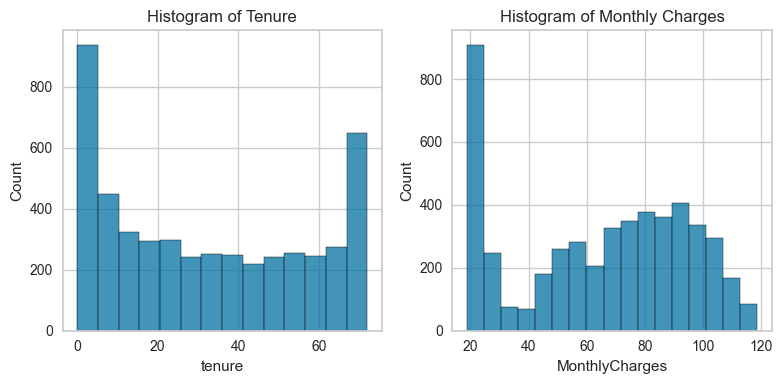

In [87]:
# Set up the figure and axes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

# Create boxplot for 'tenure'
sns.histplot(x=df['tenure'], ax=axes[0])
axes[0].set_title('Histogram of Tenure')

# Create boxplot for 'MonthlyCharges'
sns.histplot(x=df['MonthlyCharges'], ax=axes[1])
axes[1].set_title('Histogram of Monthly Charges')

plt.tight_layout()
plt.show()


In [88]:
df_num= df.select_dtypes(include='number')

def test_normality(df, alpha=0.05):
    # Create an empty DataFrame to hold the results
    result_df = pd.DataFrame(index=df.columns, columns=["Normality Test Result"])
    
    # Perform Shapiro-Wilk test for each column
    for column in df.columns:
        data = df[column]
        stat, p = shapiro(data)
        if p > alpha:
            result = "Normal"
        else:
            result = "Not Normal"
        result_df.loc[column, "Normality Test Result"] = result
    
    return result_df

# Example usage:
# Assuming 'my_dataframe' is your DataFrame containing your data
result_df = test_normality(df_num).reset_index()
result_df

,index,Normality Test Result
0,tenure,Not Normal
1,MonthlyCharges,Not Normal


##### **Correlation Assesment**
- Numerical features have low correlation with each other
- The correlation among categorical features appears to be very high in features like online security, online backup, internet service, device protection, and tech support this can lead into multicolinearity that can affect model performance. These features also have medium correlation with the contract type, whereas the correlation with dependents and paperless billing is very low.
- The correlation between features and the target mostly has low magnitude, with only one feature can be considered as medium magnitude, which is tenure with a negative correlation direction.

In [89]:
from sklearn.preprocessing import LabelEncoder
df_corr= df.copy()
df_corr['churn_encoded']= LabelEncoder().fit_transform(df['Churn'])

In [90]:
df_corr.select_dtypes(include='number').corr('spearman').style.background_gradient(cmap='YlOrRd')

,tenure,MonthlyCharges,churn_encoded
tenure,1.000000,0.265964,-0.377811
MonthlyCharges,0.265964,1.000000,0.184612
churn_encoded,-0.377811,0.184612,1.000000


In [91]:
df_corr.select_dtypes(include='object').phik_matrix().style.background_gradient(cmap='YlOrRd')

,Dependents,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,Churn
Dependents,1.000000,0.111586,0.086239,0.107844,0.083325,0.102492,0.147841,0.168718,0.263869
OnlineSecurity,0.111586,1.000000,0.947036,0.949761,0.946561,0.952145,0.630316,0.209820,0.209128
OnlineBackup,0.086239,0.947036,1.000000,0.942894,0.948154,0.947837,0.576490,0.194131,0.182379
InternetService,0.107844,0.949761,0.942894,1.000000,0.942801,0.949225,0.507184,0.230172,0.196474
DeviceProtection,0.083325,0.946561,0.948154,0.942801,1.000000,0.950512,0.627447,0.194845,0.166714
TechSupport,0.102492,0.952145,0.947837,0.949225,0.950512,1.000000,0.665337,0.200426,0.204940
Contract,0.147841,0.630316,0.576490,0.507184,0.627447,0.665337,1.000000,0.105672,0.257979
PaperlessBilling,0.168718,0.209820,0.194131,0.230172,0.194845,0.200426,0.105672,1.000000,0.290668
Churn,0.263869,0.209128,0.182379,0.196474,0.166714,0.204940,0.257979,0.290668,1.000000


Judging from the relationship graph between internet service and online security, online backup, device protection, tech support features, the high correlation is because customers who do not have internet service cause other features to be labeled 'No Internet Service'. Meanwhile, other types of internet services (DSL and Fiber Optic) do not have a big influence on customer choices to use or not use other features.

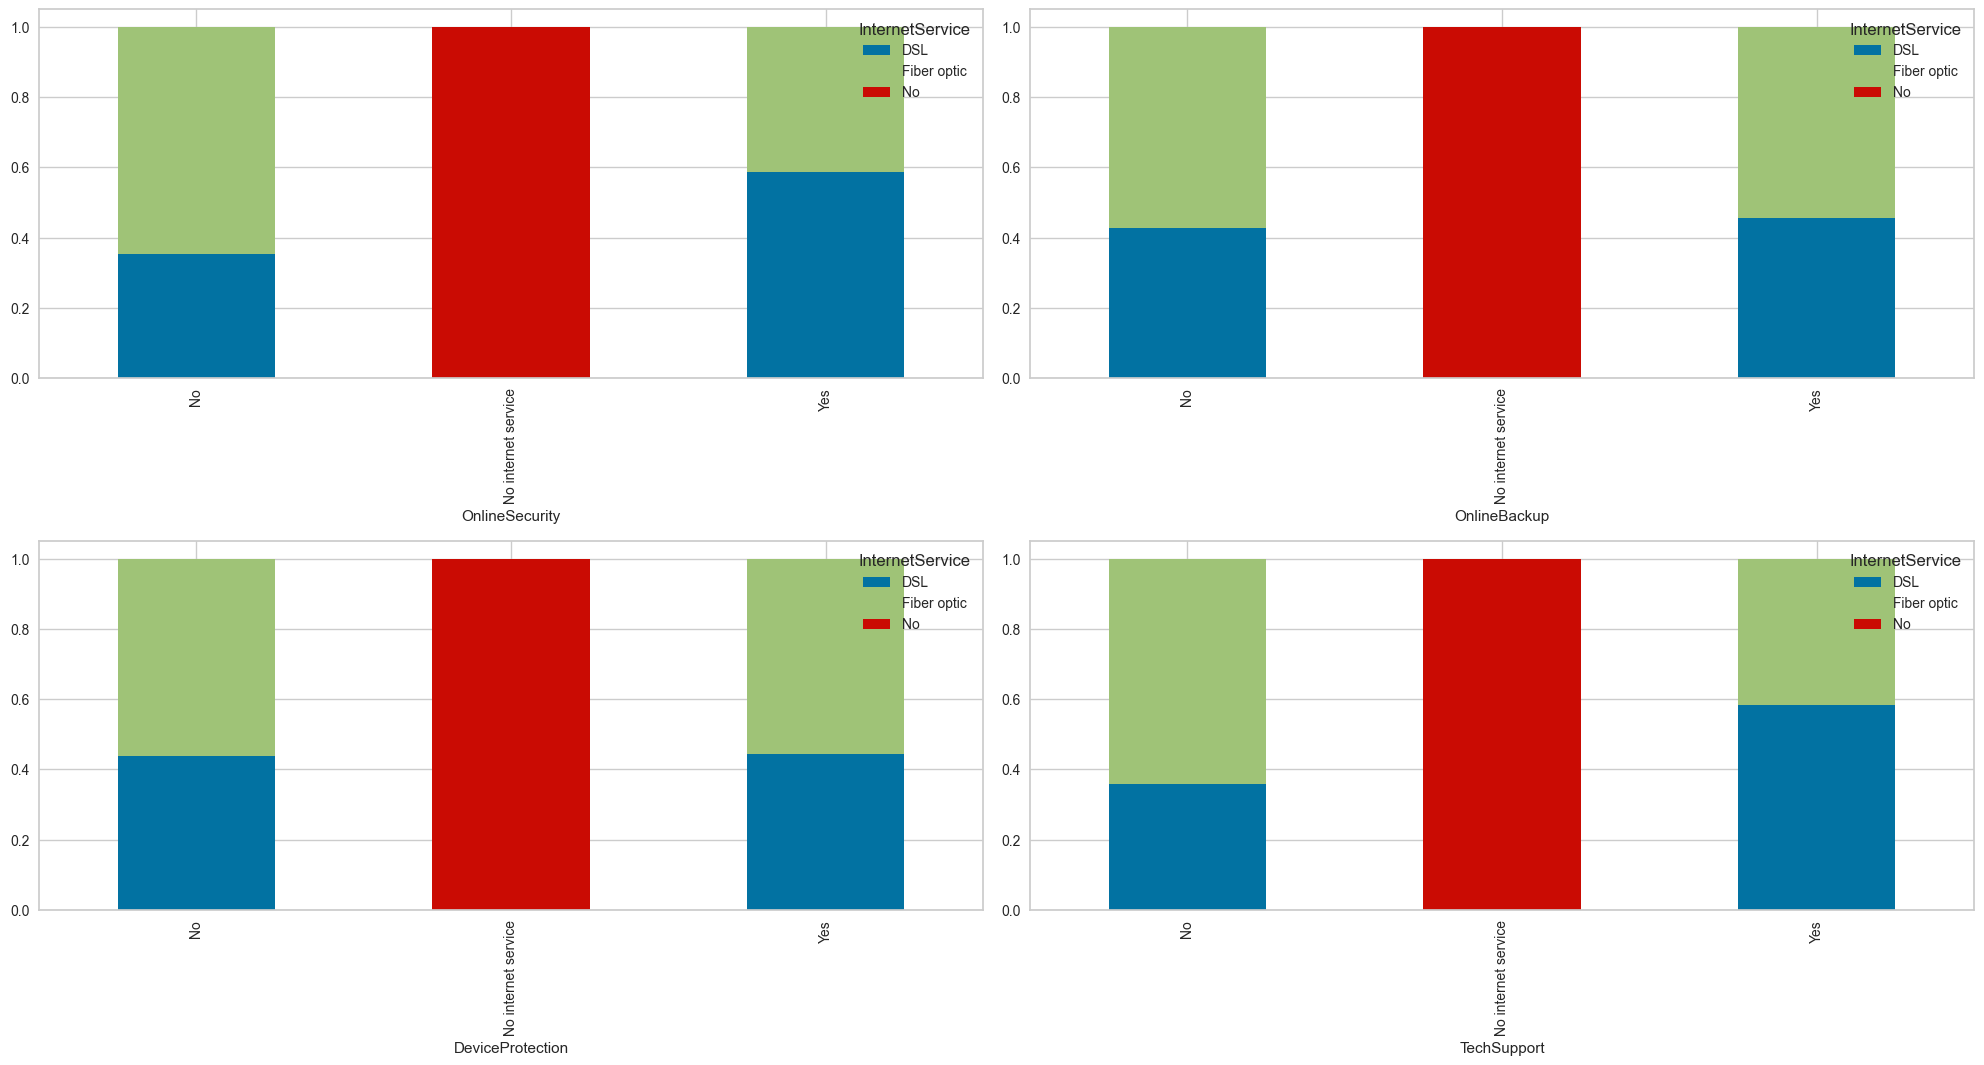

In [92]:
count = 0
fig = plt.figure(figsize=(20,20))

for i in df[["OnlineSecurity","OnlineBackup", "DeviceProtection", "TechSupport"]]:
    count +=1
    ax= plt.subplot(4,2,count)
    pd.crosstab(df[i],df["InternetService"],normalize=0).plot(kind='bar',stacked=True,ax=ax)
    fig.tight_layout()

plt.show()

Looking at the graph of the relationship between online security and the features of internet service, online backup, device protection, tech support, there is also a high correlation caused by the label 'No Internet Service'. However, customers who have online security do not all use other features, and vice versa.

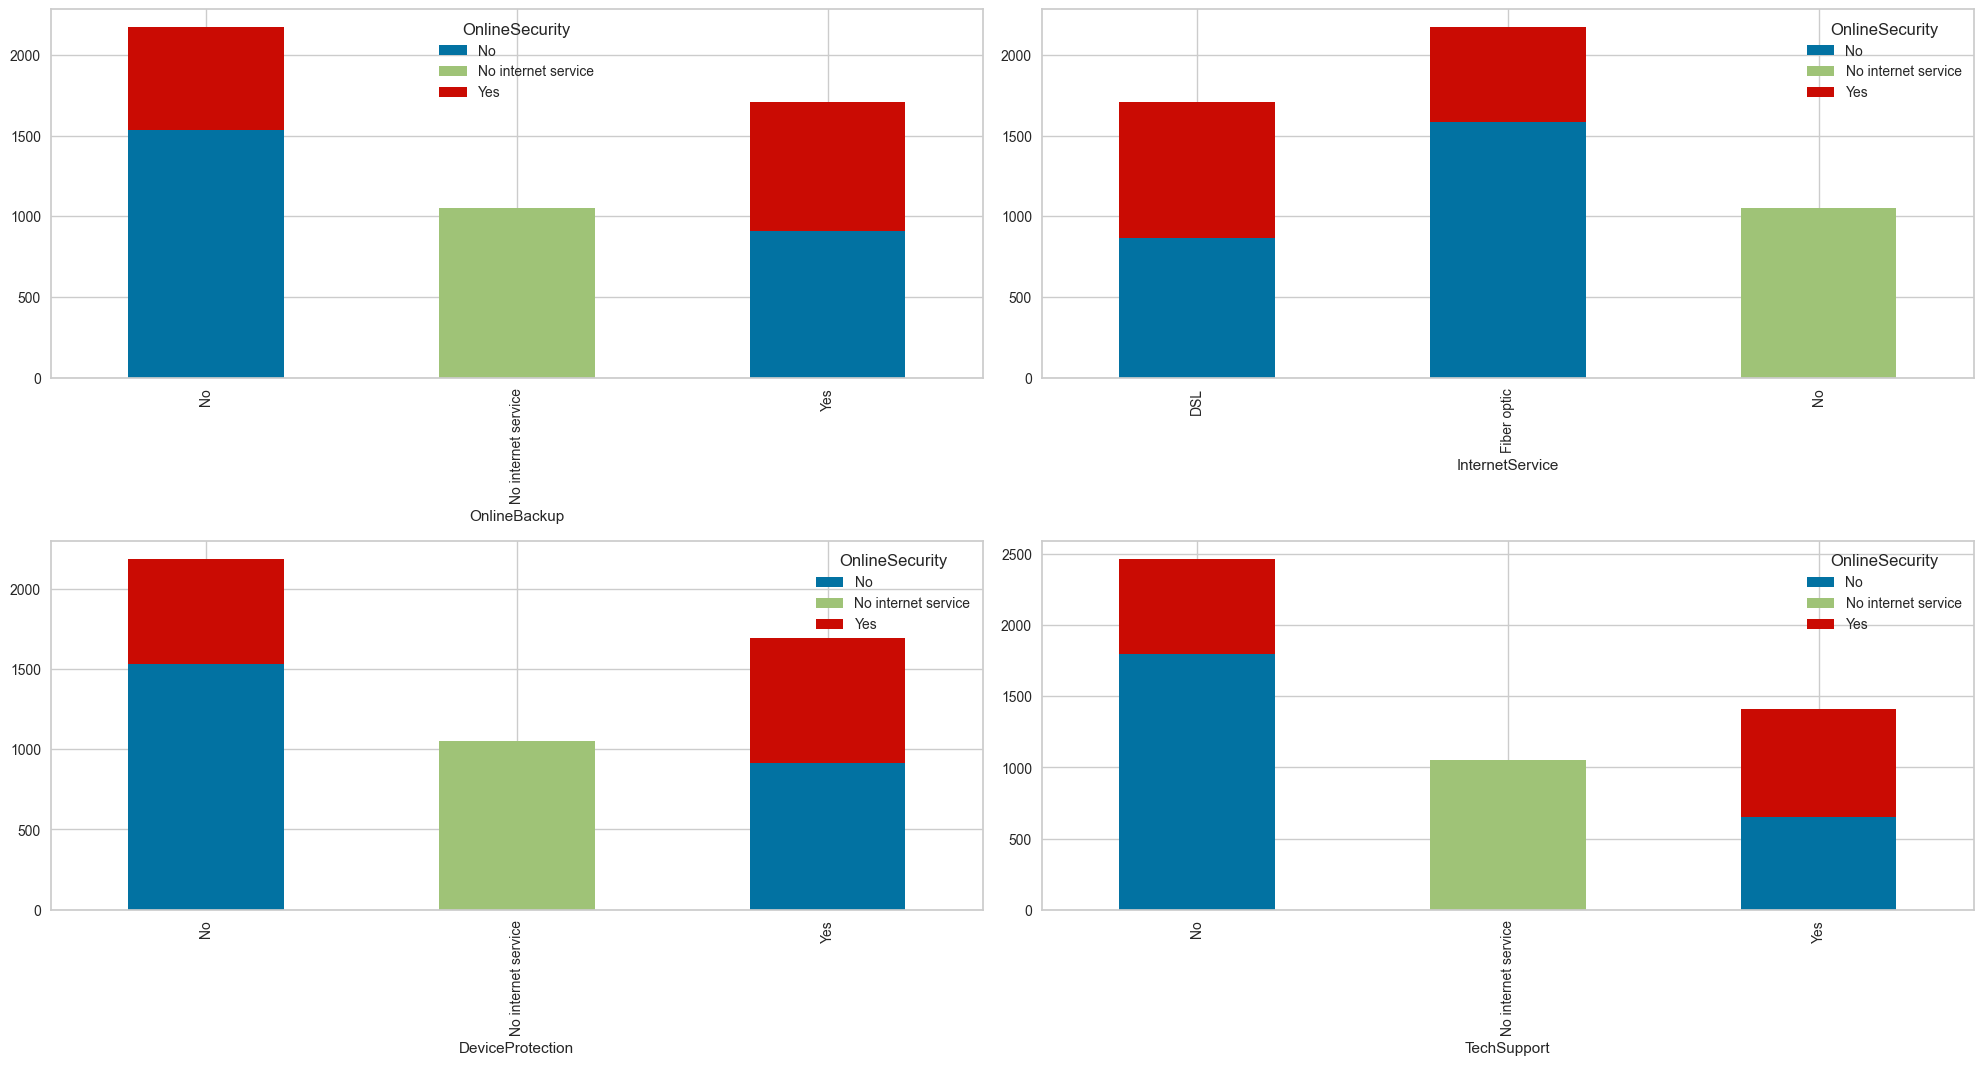

In [93]:
count = 0
fig = plt.figure(figsize=(20,20))

for i in df[["OnlineBackup", "InternetService", "DeviceProtection", "TechSupport"]]:
    count +=1
    ax= plt.subplot(4,2,count)
    pd.crosstab(df[i],df["OnlineSecurity"],normalize=False).plot(kind='bar',stacked=True,ax=ax)
    fig.tight_layout()

plt.show()

- Categorical Feature and Target Correlation

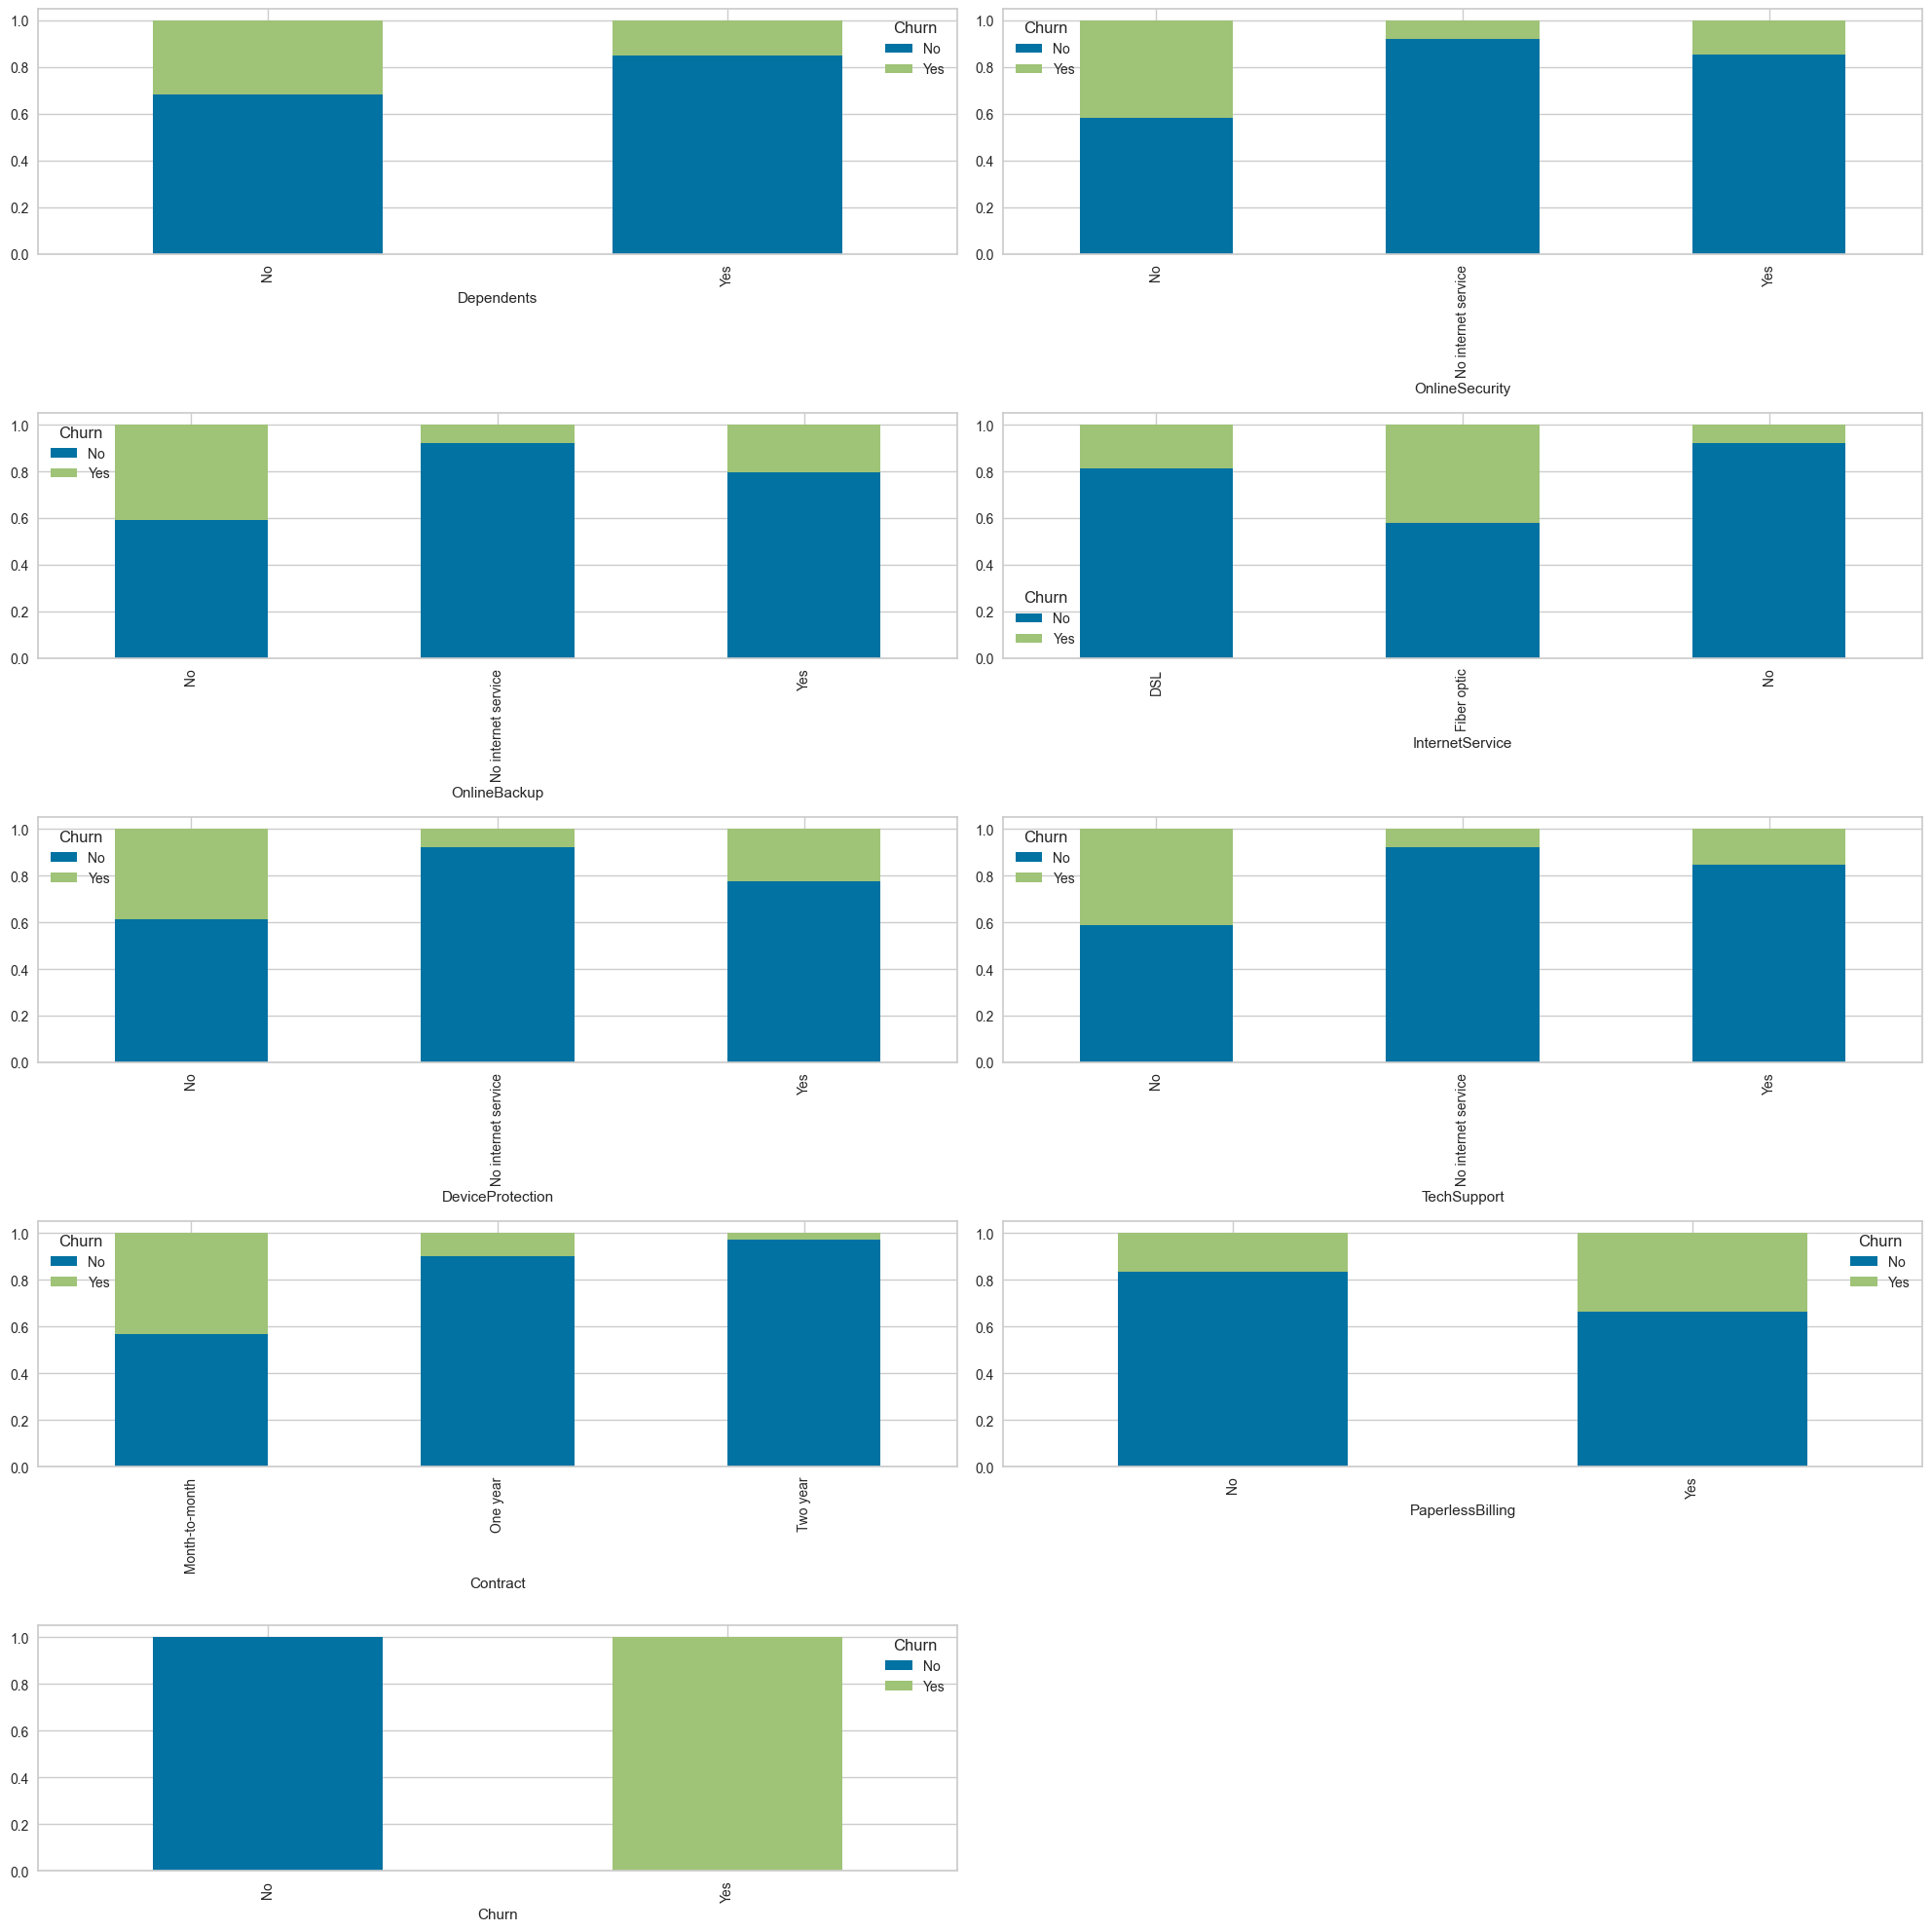

In [94]:
count = 0
fig = plt.figure(figsize=(20,20))

for i in df.select_dtypes(include='object').columns:
    count +=1
    ax= plt.subplot(5,2,count)
    pd.crosstab(df[i],df['Churn'],normalize=0).plot(kind='bar',stacked=True,ax=ax)
    fig.tight_layout()

plt.show()

- `Dependents`: Percentage of customer churn is more for customers with no dependents.
- `Online Security`: Percentage of customer churn is more for customers who do not have online security
- `Online Backup`: The percentage of customer churn is more for customers who do not have online backup
- `Internet Service`: The percentage of customer churn is more for customers who use fiber optic
- `Device Protection`: The percentage of customer churn is more for customers who do not have device protection
- `Tech Support`: The percentage of customer churn is more for customers who do not have tech support
- `Contract`: The percentage of customer churn is more for customers who choose Month-to-month as their contract type.
- `Paperless Billing`: The percentage of customer churn is more for customers who choose paperless billing


## **4. Data Preparation**

#### **Duplicated Value**

In [95]:
# Check duplicated value
df.duplicated().mean()*100

1.561866125760649

In [96]:
# Drop duplicated
df.drop_duplicates(inplace= True)

#### **Outlier Data**

- The tenure and monthly charges features don't have outlier data

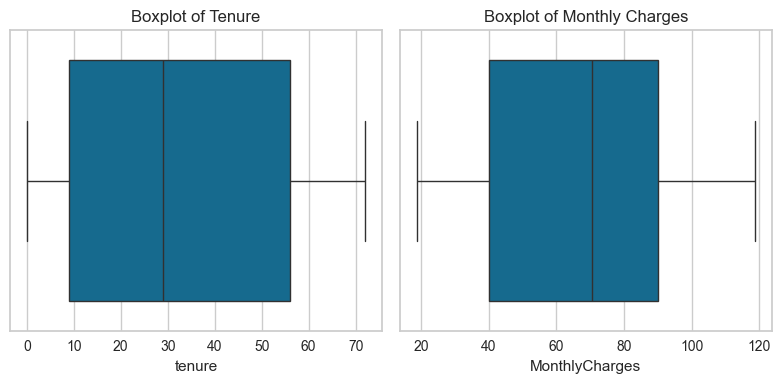

In [97]:
# Set up the figure and axes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

# Create boxplot for 'tenure'
sns.boxplot(x=df['tenure'], ax=axes[0])
axes[0].set_title('Boxplot of Tenure')

# Create boxplot for 'MonthlyCharges'
sns.boxplot(x=df['MonthlyCharges'], ax=axes[1])
axes[1].set_title('Boxplot of Monthly Charges')

plt.tight_layout()
plt.show()


In [98]:
columns_of_interest = ['tenure', 'MonthlyCharges']
outlier_info = {}

for column in columns_of_interest:
    # Calculate the IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter the DataFrame to extract outlier data
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    # Summarize the outlier data
    outlier_sum = outliers[column].count()
    
    # Store the outlier sum in the dictionary
    outlier_info[column] = {'Lower Bound': lower_bound, 'Upper Bound': upper_bound, 'Total Outlier': outlier_sum}

# Step 4: Convert the dictionary to a DataFrame for table format
outlier_table = pd.DataFrame(outlier_info).transpose()

outlier_table['Percentage']= round(outlier_table['Total Outlier']/df['Dependents'].count()*100,2)
outlier_table

,Lower Bound,Upper Bound,Total Outlier,Percentage
tenure,-61.50,126.50,0.0,0.0
MonthlyCharges,-34.95,165.05,0.0,0.0


#### **Data Types and Cardinality**


- 8 out of 10 features are categorical data type, which must be encoded
- The categorical data types have only 2-3 unique labels which can be categorized as **low cardinality**

In [99]:
pd.DataFrame({
    'Name': df.columns.values,
    'Type': df.dtypes.values,
    'N/A (%)': df.isna().mean().values * 100,
    'Unique': df.nunique().values,
    'Sample': [df[col].unique() for col in df.columns]
})

,Name,Type,N/A (%),Unique,Sample
0,Dependents,object,0.0,2,"[Yes, No]"
1,tenure,int64,0.0,73,"[9, 14, 64, 72, 3, 40, 17, 11, 8, 47, 18, 5, 1..."
2,OnlineSecurity,object,0.0,3,"[No, Yes, No internet service]"
3,OnlineBackup,object,0.0,3,"[No, Yes, No internet service]"
4,InternetService,object,0.0,3,"[DSL, Fiber optic, No]"
5,DeviceProtection,object,0.0,3,"[Yes, No internet service, No]"
6,TechSupport,object,0.0,3,"[Yes, No, No internet service]"
7,Contract,object,0.0,3,"[Month-to-month, Two year, One year]"
8,PaperlessBilling,object,0.0,2,"[Yes, No]"
9,MonthlyCharges,float64,0.0,1422,"[72.9, 82.65, 47.85, 69.65, 23.6, 74.55, 19.7,..."


**Target**
| Target | Data Type | Handling |
| --- | --- | --- |
| Churn | Nominal | Encode |

**Numeric Feature**

| Feature | Data Type | Handling |
| --- | --- | --- |
| Tenure | Discrete | - |
| MonthlyCharges | Continues | -|

**Categorical Feature**

| Feature | Data Type | Handling |
| --- | --- | --- |
| Dependents| Nominal | One Hot Encoding |
| OnlineSecurity | Nominal | One Hot Encoding |
| OnlineBackup	| Nominal | One Hot Encoding |
| InternetService | Nominal | One Hot Encoding |
| DeviceProtection | Nominal | One Hot Encoding |
| TechSupport | Nominal | One Hot Encoding |
| Contract | Nominal | One Hot Encoding |
| PaperlessBilling | Nominal | One Hot Encoding|


#### **Rare Label and Imbalance Data**

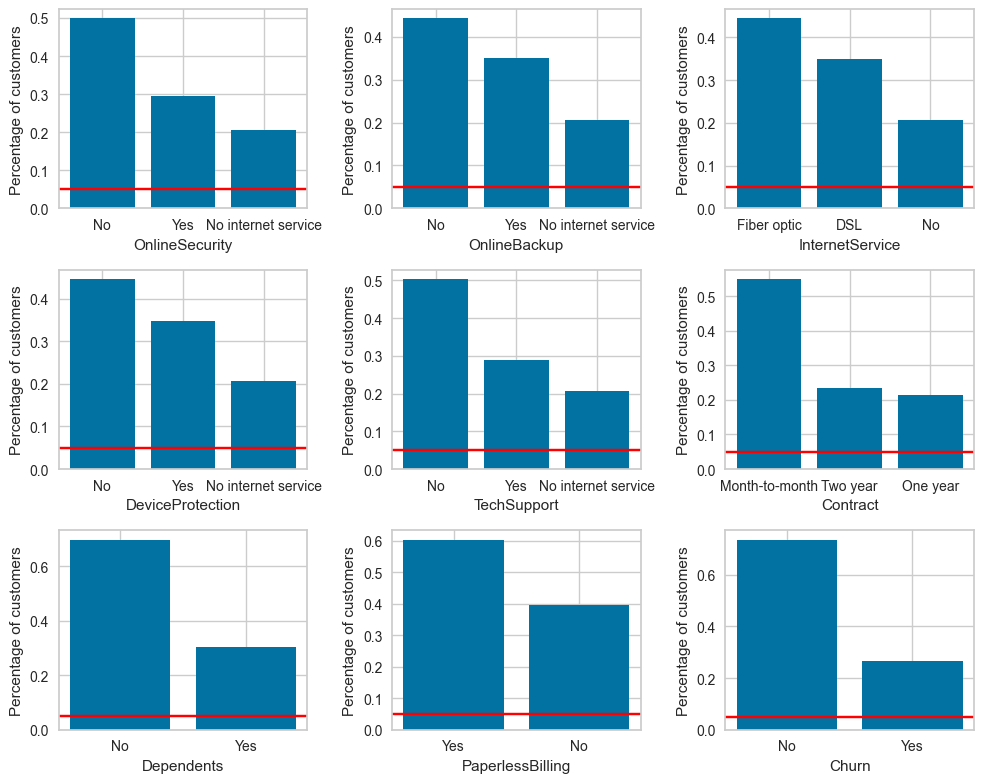

In [100]:
# Total customers
total_customers= len(df)
cat_cols = ["OnlineSecurity", "OnlineBackup", "InternetService", "DeviceProtection", "TechSupport", "Contract", "Dependents", "PaperlessBilling", "Churn"]

# Define the number of rows and columns for the subplot grid
num_rows = 3
num_cols = 3

# Calculate the total number of plots
total_plots = num_rows * num_cols

# Create a new figure
fig, axs = plt.subplots(num_rows, num_cols, figsize=(10, 8))

# Initialize a counter for the plots
plot_counter = 0

# Loop through each categorical variable
for col in cat_cols:
    # Calculate the percentage of houses per category
    temp_df = pd.Series(df[col].value_counts() / total_customers)

    # Sort the values in descending order
    temp_df = temp_df.sort_values(ascending=False)

    # Determine the position of the current plot in the subplot grid
    row_index = plot_counter // num_cols
    col_index = plot_counter % num_cols

    # Plot the data in the appropriate subplot
    axs[row_index, col_index].bar(temp_df.index, temp_df)
    axs[row_index, col_index].set_xlabel(col)
    axs[row_index, col_index].set_ylabel('Percentage of customers')

    # Add a red line at the threshold for rare categories (5%)
    axs[row_index, col_index].axhline(y=0.05, color='red')

    # Increment the plot counter
    plot_counter += 1

# Adjust layout to prevent overlapping of subplots
plt.tight_layout()

# Show the plots
plt.show()


,class,n_churned
0,No,3565
1,Yes,1288


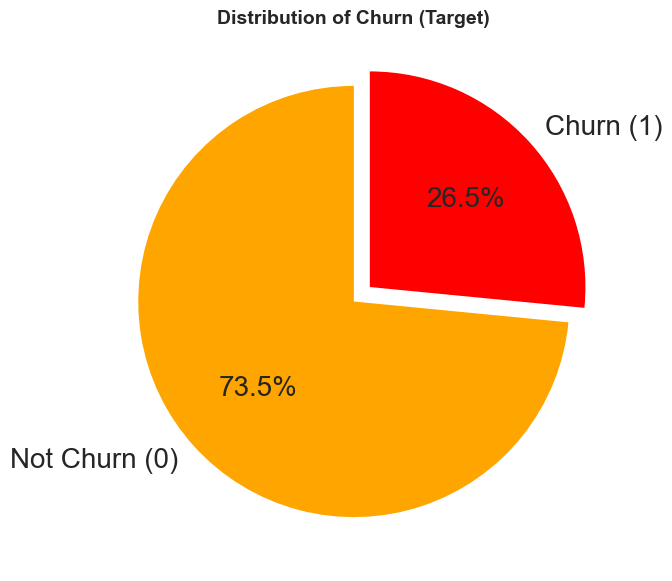

In [101]:
plt.figure(figsize=(7,7))
plt.title('Distribution of Churn (Target)', size=14, weight='bold')
plt.pie(df['Churn'].value_counts(), explode=(0,0.1), labels=['Not Churn (0)', 'Churn (1)'], colors=["orange","red"], autopct='%1.1f%%', 
        startangle=90, textprops={"fontsize":20})

n_churned = pd.DataFrame(df['Churn'].value_counts()).reset_index().rename(columns={'index':'class', 'Churn':'n_churned'})
n_churned

- From all categorical features the frequency of occurrence for each label is quite common and does not tend towards rare labels.
- The ratio between 'No' and 'Yes' labels in the target is 7:3, so it can be said that the dataset has mild imbalance data, which can lead to biased models and reduced performance [source](https://developers.google.com/machine-learning/data-prep/construct/sampling-splitting/imbalanced-data)

#### **Data Preprocessing**

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from category_encoders import BinaryEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PolynomialFeatures
from pycaret.internal.preprocess.transformers import TransformerWrapper
from sklearn.metrics import fbeta_score
from imblearn.over_sampling import SMOTE
from pycaret.internal.preprocess.transformers import FixImbalancer

In [103]:
RANDOM_STATE = 15

# Encode Target
df['Churn'] = np.where(df['Churn']=='Yes', 1, 0)

# Split dataset
df_seen, df_unseen = train_test_split(df, test_size=0.2, random_state=RANDOM_STATE, stratify=df['Churn'])

In [104]:
# Save Data
df_seen.to_csv("../data/df_seen.csv")
df_unseen.to_csv("../data/df_unseen.csv")

In [105]:
# Data prepocessor pipeline 1
pipeline_1= [
    ("onehot", TransformerWrapper(
        include=['Dependents', 'PaperlessBilling','OnlineSecurity', 'OnlineBackup','InternetService', 'DeviceProtection', 'TechSupport', 'Contract'], 
        transformer=OneHotEncoder(drop='first'))),
]

In [106]:
# Data prepocessor pipeline 2
pipeline_2= [
    ("onehot", TransformerWrapper(
        include=['Dependents', 'PaperlessBilling'], 
        transformer=OneHotEncoder(drop='first'))),
    ("binary", TransformerWrapper(
        include=['OnlineSecurity', 'OnlineBackup','InternetService', 'DeviceProtection', 'TechSupport', 'Contract'], 
        transformer=BinaryEncoder())),
]

In [107]:
# Data prepocessor pipeline 3
pipeline_3= [
    ("onehot", TransformerWrapper(
        include=['Dependents', 'PaperlessBilling'], 
        transformer=OneHotEncoder(drop='first'))),
    ("binary", TransformerWrapper(
        include=['OnlineSecurity', 'OnlineBackup','InternetService', 'DeviceProtection', 'TechSupport', 'Contract'], 
        transformer=BinaryEncoder())),
    ("scaler", TransformerWrapper(
        include=['tenure','MonthlyCharges'], 
        transformer=RobustScaler())),
]

In [108]:
from sklearn.preprocessing import KBinsDiscretizer
# Data prepocessor pipeline 4
pipeline_4= [
    ("onehot", TransformerWrapper(
        include=['Dependents', 'PaperlessBilling'], 
        transformer=OneHotEncoder(drop='first'))),
    ("binary", TransformerWrapper(
        include=['OnlineSecurity', 'OnlineBackup','InternetService', 'DeviceProtection', 'TechSupport', 'Contract'], 
        transformer=BinaryEncoder())),
    ("binning",TransformerWrapper(
        include=['tenure','MonthlyCharges'],
        transformer= KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='kmeans')))
]

- Although not all model performance is affected by the high correlation between features that may cause multicollinearity, after several model building experiments, the most optimal model was obtained by ignoring several features such as OnlineSecurity, OnlineBackup, DeviceProtection, and TechSupport.

In [109]:
from pycaret.classification import *

# Define configuration parameters
configs = {
    'data': df_seen, 
    'target': 'Churn', 
    'train_size': 0.8,
    'verbose': False,
    'preprocess': None,
    'session_id': RANDOM_STATE, 
    'fold': 5,
    'ignore_features':["OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport"],
    'log_experiment': False,
    'system_log': False
}

setup(**configs, custom_pipeline=pipeline_1)

## **5. Model Experiment**

From the results of business understanding, the existence of False Negative (the model predicts the customer will not churn when in fact it will) provides a loss 12 times greater than the False Positive (the model predicts the customer will churn, but not), therefore, in this modeling, the main report classification used is the F4 value, while still considering the Recall and Precision values.

* **F4-score**: The F4 score is a weighted harmonic mean of precision and recall, giving more importance to recall.
* **Recall**: Measures how many observations out of all positive observations have we classified as positive.
* **Precision**: Measures how many observations predicted as positive are in fact positive.



Pipeline 1 applies onehot encoding for all categorical variables ('Dependents', 'PaperlessBilling','InternetService','Contract')

In [110]:
preproces = ClassificationExperiment()
preproces.setup(**configs,custom_pipeline= pipeline_1)
preproces.add_metric('F4','F4', fbeta_score, beta=4)

# Tampilkan pipeline
preproces.get_config('pipeline')

Pipeline(memory=FastMemory(location=/var/folders/r3/3x0l6ykd3bn24txdxp3s1rwh0000gn/T/joblib),
         steps=[('onehot',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=TransformerWrapper(exclude=None,
                                                                   include=['Dependents',
                                                                            'PaperlessBilling',
                                                                            'OnlineSecurity',
                                                                            'OnlineBackup',
                                                                            'InternetService',
                                                                            'DeviceProtection',
                                                                            'TechSupport',
                                                                            'Contract'],
                                                                   transformer=OneHotEncoder(categories='auto',
                                                                                             drop='first',
                                                                                             dtype=<class 'numpy.float64'>,
                                                                                             handle_unknown='error',
                                                                                             max_categories=None,
                                                                                             min_frequency=None,
                                                                                             sparse='deprecated',
                                                                                             sparse_output=True))))],
         verbose=False)

In [111]:
preproces.compare_models(sort='F4', probability_threshold=0.40)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,F4,TT (Sec)
ada,Ada Boost Classifier,0.2657,0.8331,0.9988,0.2653,0.4193,-0.0002,-0.0021,0.8591,0.0380
nb,Naive Bayes,0.7101,0.8266,0.8277,0.4753,0.6033,0.4010,0.4394,0.7929,0.0980
qda,Quadratic Discriminant Analysis,0.7150,0.8309,0.8228,0.4804,0.6062,0.4069,0.4430,0.7895,0.0180
knn,K Neighbors Classifier,0.7179,0.7703,0.7112,0.4793,0.5725,0.3739,0.3901,0.6914,0.1120
lda,Linear Discriminant Analysis,0.7813,0.8343,0.6371,0.5835,0.6078,0.4570,0.4587,0.6333,0.0340
lr,Logistic Regression,0.7762,0.8373,0.6371,0.5725,0.6021,0.4473,0.4492,0.6326,0.1900
gbc,Gradient Boosting Classifier,0.7781,0.8336,0.6262,0.5767,0.5998,0.4468,0.4480,0.6229,0.0380
lightgbm,Light Gradient Boosting Machine,0.7662,0.8218,0.6250,0.5542,0.5868,0.4248,0.4267,0.6201,0.0300
rf,Random Forest Classifier,0.7597,0.8019,0.5898,0.5460,0.5663,0.4007,0.4018,0.5868,0.0500
et,Extra Trees Classifier,0.7523,0.7742,0.5691,0.5337,0.5502,0.3798,0.3806,0.5668,0.0780


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

CustomProbabilityThresholdClassifier(algorithm='SAMME.R',
                                     base_estimator='deprecated',
                                     classifier=AdaBoostClassifier(algorithm='SAMME.R',
                                                                   base_estimator='deprecated',
                                                                   estimator=None,
                                                                   learning_rate=1.0,
                                                                   n_estimators=50,
                                                                   random_state=15),
                                     estimator=None, learning_rate=1.0,
                                     n_estimators=50, probability_threshold=0.4,
                                     random_state=15)

- In pipeline 4, several preprocessing processes are carried out, using onehot for Dependents, PaperlessBilling, binary for InternetService, Contract , and binning for 'tenure','MonthlyCharges', with the aim of improving model performance.

In [112]:
preproces_1 = ClassificationExperiment()
preproces_1.setup(**configs,custom_pipeline= pipeline_4)
preproces_1.add_metric('F4','F4', fbeta_score, beta=4)

# Tampilkan pipeline
preproces_1.get_config('pipeline')

Pipeline(memory=FastMemory(location=/var/folders/r3/3x0l6ykd3bn24txdxp3s1rwh0000gn/T/joblib),
         steps=[('onehot',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=TransformerWrapper(exclude=None,
                                                                   include=['Dependents',
                                                                            'PaperlessBilling'],
                                                                   transformer=OneHotEncoder(categories='auto',
                                                                                             drop='first',
                                                                                             dtype=<class 'numpy.float64'>,
                                                                                             handle_unknown='error',...
                                                                                                       'mapping':     Contract_0  Contract_1
 1           0           1
 2           1           0
 3           1           1
-1           0           0
-2           0           0}],
                                                                                             return_df=True,
                                                                                             verbose=0)))),
                ('binning',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=TransformerWrapper(exclude=None,
                                                                   include=['tenure',
                                                                            'MonthlyCharges'],
                                                                   transformer=KBinsDiscretizer(dtype=None,
                                                                                                encode='ordinal',
                                                                                                n_bins=15,
                                                                                                random_state=None,
                                                                                                strategy='kmeans',
                                                                                                subsample='warn'))))],
         verbose=False)

In [113]:
preproces_1.compare_models(sort='F4', probability_threshold=0.4)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,F4,TT (Sec)
ada,Ada Boost Classifier,0.2654,0.8376,1.0000,0.2654,0.4194,0.0000,0.0000,0.8600,0.0460
qda,Quadratic Discriminant Analysis,0.7166,0.8295,0.8265,0.4820,0.6085,0.4104,0.4470,0.7929,0.0300
nb,Naive Bayes,0.7037,0.8246,0.8264,0.4687,0.5976,0.3910,0.4307,0.7906,0.0300
knn,K Neighbors Classifier,0.7147,0.7755,0.7148,0.4766,0.5711,0.3704,0.3881,0.6941,0.0580
gbc,Gradient Boosting Classifier,0.7813,0.8356,0.6480,0.5815,0.6120,0.4607,0.4627,0.6434,0.0380
lr,Logistic Regression,0.7771,0.8363,0.6419,0.5740,0.6051,0.4508,0.4529,0.6372,0.0680
lda,Linear Discriminant Analysis,0.7833,0.8331,0.6395,0.5864,0.6108,0.4613,0.4628,0.6359,0.0280
lightgbm,Light Gradient Boosting Machine,0.7639,0.8220,0.6335,0.5507,0.5881,0.4242,0.4270,0.6276,0.0300
svm,SVM - Linear Kernel,0.6905,0.0000,0.6555,0.3553,0.4606,0.2825,0.3172,0.6243,0.0280
dt,Decision Tree Classifier,0.7291,0.7391,0.6348,0.4923,0.5542,0.3642,0.3705,0.6240,0.0420


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

CustomProbabilityThresholdClassifier(algorithm='SAMME.R',
                                     base_estimator='deprecated',
                                     classifier=AdaBoostClassifier(algorithm='SAMME.R',
                                                                   base_estimator='deprecated',
                                                                   estimator=None,
                                                                   learning_rate=1.0,
                                                                   n_estimators=50,
                                                                   random_state=15),
                                     estimator=None, learning_rate=1.0,
                                     n_estimators=50, probability_threshold=0.4,
                                     random_state=15)

Pipeline 1 and pipeline 4 provide F4, Recall, and Precision results that are not too different, but the training time on pipeline 1 takes less time than pipeline 4. So for the next experiment the pipeline for prepocessing data will use pipeline 1 (Onehot encoding for categorical features)

#### **5.1 Basic Model Experiment**

From the results of the model comparison, 2 models with quite high F4 score while still considering the recall and precision values, 2 models were obtained that will be carried out further experiments, namely using Naive Bayes and Quadratic Discriminant Analysis.

##### a. Naive Bayes Model

In [114]:
# Create basic model
nb_model= preproces.create_model('nb', probability_threshold=0.4)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,F4
Fold,,,,,,,,
0,0.7488,0.8464,0.8598,0.5146,0.6438,0.4681,0.5049,0.8271
1,0.6634,0.7979,0.8364,0.4312,0.5691,0.3364,0.3864,0.7926
2,0.7085,0.8310,0.7939,0.4712,0.5914,0.3870,0.4189,0.7632
3,0.6973,0.8256,0.8242,0.4610,0.5913,0.3800,0.4206,0.7877
4,0.7327,0.8320,0.8242,0.4982,0.6210,0.4333,0.4661,0.7937
Mean,0.7101,0.8266,0.8277,0.4753,0.6033,0.4010,0.4394,0.7929
Std,0.0295,0.0159,0.0213,0.0291,0.0261,0.0455,0.0414,0.0204


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [115]:
# Hyperparameter tuning
nb_tuned= preproces.tune_model(
    estimator=nb_model,
    optimize='F4',
    custom_grid={
        'var_smoothing':[1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]
    })

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,F4
Fold,,,,,,,,
0,0.7488,0.8464,0.8598,0.5146,0.6438,0.4681,0.5049,0.8271
1,0.6634,0.7979,0.8364,0.4312,0.5691,0.3364,0.3864,0.7926
2,0.7085,0.8310,0.7939,0.4712,0.5914,0.3870,0.4189,0.7632
3,0.6973,0.8256,0.8242,0.4610,0.5913,0.3800,0.4206,0.7877
4,0.7327,0.8320,0.8242,0.4982,0.6210,0.4333,0.4661,0.7937
Mean,0.7101,0.8266,0.8277,0.4753,0.6033,0.4010,0.4394,0.7929
Std,0.0295,0.0159,0.0213,0.0291,0.0261,0.0455,0.0414,0.0204


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [116]:
# Calibrate Model
nb_tuned_cal= preproces.calibrate_model(nb_tuned)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,F4
Fold,,,,,,,,
0,0.7746,0.8464,0.7256,0.5561,0.6296,0.4716,0.4803,0.7128
1,0.7069,0.7981,0.7697,0.4686,0.5826,0.3767,0.4043,0.7417
2,0.7504,0.8311,0.7394,0.5214,0.6115,0.4356,0.4501,0.7216
3,0.7472,0.8257,0.7697,0.5163,0.6180,0.4398,0.4594,0.7481
4,0.7762,0.8321,0.7455,0.5591,0.6390,0.4815,0.4920,0.7311
Mean,0.7510,0.8267,0.7500,0.5243,0.6161,0.4411,0.4572,0.7311
Std,0.0251,0.0159,0.0173,0.0328,0.0193,0.0367,0.0303,0.0128


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

##### b. Quadratic Discriminant Analysis

In [117]:
# Create basic model
qda_model= preproces.create_model('qda', probability_threshold=0.4)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,F4
Fold,,,,,,,,
0,0.7568,0.8557,0.8476,0.5245,0.6480,0.4776,0.5097,0.8179
1,0.6570,0.7927,0.8061,0.4236,0.5553,0.3176,0.3615,0.7654
2,0.7134,0.8334,0.8061,0.4767,0.5991,0.3981,0.4315,0.7746
3,0.7150,0.8324,0.8303,0.4790,0.6075,0.4081,0.4462,0.7960
4,0.7327,0.8404,0.8242,0.4982,0.6210,0.4333,0.4661,0.7937
Mean,0.7150,0.8309,0.8228,0.4804,0.6062,0.4069,0.4430,0.7895
Std,0.0330,0.0208,0.0157,0.0332,0.0304,0.0524,0.0485,0.0183


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [118]:
# Hyperparameter tuning
qda_tuned= preproces.tune_model(
    estimator=qda_model,
    optimize='F4',
    custom_grid= {
        'priors': [[0.3, 0.7]],
    })

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,F4
Fold,,,,,,,,
0,0.6957,0.8557,0.9024,0.4611,0.6103,0.4009,0.4622,0.8543
1,0.6473,0.7927,0.8485,0.4192,0.5611,0.3188,0.3748,0.8003
2,0.6940,0.8334,0.8424,0.4587,0.5940,0.3811,0.4266,0.8029
3,0.6828,0.8324,0.8606,0.4494,0.5904,0.3708,0.4232,0.8166
4,0.6876,0.8404,0.8364,0.4525,0.5872,0.3700,0.4154,0.7966
Mean,0.6815,0.8309,0.8581,0.4482,0.5886,0.3683,0.4204,0.8142
Std,0.0177,0.0208,0.0236,0.0151,0.0159,0.0271,0.0279,0.0212


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 1 candidates, totalling 5 fits


In [119]:
qda_tuned_cal= preproces.calibrate_model(qda_tuned)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,F4
Fold,,,,,,,,
0,0.7971,0.8559,0.6707,0.6044,0.6358,0.4957,0.4970,0.6664
1,0.7150,0.7927,0.7333,0.4764,0.5776,0.3768,0.3968,0.7108
2,0.7697,0.8334,0.7333,0.5500,0.6286,0.4666,0.4767,0.7192
3,0.7649,0.8324,0.7152,0.5438,0.6178,0.4525,0.4614,0.7021
4,0.7987,0.8405,0.7273,0.6000,0.6575,0.5169,0.5216,0.7183
Mean,0.7691,0.8310,0.7160,0.5549,0.6235,0.4617,0.4707,0.7034
Std,0.0304,0.0209,0.0236,0.0465,0.0264,0.0480,0.0421,0.0195


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

After experimenting on the base model, it turns out that the results of the F4 score are still not optimal, therefore we will try to handle imbalance data first.

#### **5.2 Imbalance Model Experiment**

In [120]:
# Initialize experiment setup for imbalance experiment using Nearmiss

from imblearn.under_sampling import NearMiss
nearmiss = ClassificationExperiment()
nearmiss.setup(**configs,custom_pipeline= pipeline_1 +[('nearmiss', FixImbalancer(NearMiss(version=3)))])
           
nearmiss.add_metric('F4','F4', fbeta_score, beta=4)

# Tampilkan pipeline
nearmiss.get_config('pipeline')

Pipeline(memory=FastMemory(location=/var/folders/r3/3x0l6ykd3bn24txdxp3s1rwh0000gn/T/joblib),
         steps=[('onehot',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=TransformerWrapper(exclude=None,
                                                                   include=['Dependents',
                                                                            'PaperlessBilling',
                                                                            'OnlineSecurity',
                                                                            'OnlineBackup',
                                                                            'InternetService',
                                                                            'DeviceProtection',
                                                                            'TechSupport',
                                                                            'Contract'],
                                                                   transformer=One...',
                                                                                             drop='first',
                                                                                             dtype=<class 'numpy.float64'>,
                                                                                             handle_unknown='error',
                                                                                             max_categories=None,
                                                                                             min_frequency=None,
                                                                                             sparse='deprecated',
                                                                                             sparse_output=True)))),
                ('nearmiss',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=FixImbalancer(estimator=NearMiss(n_jobs=None,
                                                                                 n_neighbors=3,
                                                                                 n_neighbors_ver3=3,
                                                                                 sampling_strategy='auto',
                                                                                 version=3))))],
         verbose=False)

In [121]:
# Initialize experiment setup for imbalance experiment using Polynomial and Nearmiss

from imblearn.under_sampling import NearMiss
nepo = ClassificationExperiment()
nepo.setup(**configs,custom_pipeline= pipeline_1 +[('Nearmiss poly', TransformerWrapper(transformer=PolynomialFeatures(degree=3, interaction_only=False, include_bias=False)))]
           +[('polynomial', FixImbalancer(NearMiss(version=3)))])
           
nepo.add_metric('F4','F4', fbeta_score, beta=4)

# Tampilkan pipeline
nepo.get_config('pipeline')

Pipeline(memory=FastMemory(location=/var/folders/r3/3x0l6ykd3bn24txdxp3s1rwh0000gn/T/joblib),
         steps=[('onehot',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=TransformerWrapper(exclude=None,
                                                                   include=['Dependents',
                                                                            'PaperlessBilling',
                                                                            'OnlineSecurity',
                                                                            'OnlineBackup',
                                                                            'InternetService',
                                                                            'DeviceProtection',
                                                                            'TechSupport',
                                                                            'Contract'],
                                                                   transformer=One...
                                    transformer=TransformerWrapper(exclude=None,
                                                                   include=None,
                                                                   transformer=PolynomialFeatures(degree=3,
                                                                                                  include_bias=False,
                                                                                                  interaction_only=False,
                                                                                                  order='C')))),
                ('polynomial',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=FixImbalancer(estimator=NearMiss(n_jobs=None,
                                                                                 n_neighbors=3,
                                                                                 n_neighbors_ver3=3,
                                                                                 sampling_strategy='auto',
                                                                                 version=3))))],
         verbose=False)

In [122]:
nearmiss.compare_models(include=['nb','qda'], sort='F4', probability_threshold=0.4)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,F4,TT (Sec)
nb,Naive Bayes,0.6770,0.8281,0.8872,0.4460,0.5935,0.3712,0.4320,0.8383,0.0180
qda,Quadratic Discriminant Analysis,0.6738,0.8173,0.8799,0.4431,0.5892,0.3647,0.4240,0.8316,0.0180


Processing:   0%|          | 0/13 [00:00<?, ?it/s]

CustomProbabilityThresholdClassifier(classifier=GaussianNB(priors=None,
                                                           var_smoothing=1e-09),
                                     priors=None, probability_threshold=0.4,
                                     var_smoothing=1e-09)

In [123]:
nepo.compare_models(include=['nb','qda'], sort='F4', probability_threshold=0.4)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,F4,TT (Sec)
qda,Quadratic Discriminant Analysis,0.5720,0.6940,0.9369,0.3781,0.5384,0.2571,0.3517,0.8616,0.0300
nb,Naive Bayes,0.5987,0.7829,0.8920,0.3890,0.5416,0.2726,0.3481,0.8289,0.0340


Processing:   0%|          | 0/13 [00:00<?, ?it/s]

CustomProbabilityThresholdClassifier(classifier=QuadraticDiscriminantAnalysis(priors=None,
                                                                              reg_param=0.0,
                                                                              store_covariance=False,
                                                                              tol=0.0001),
                                     priors=None, probability_threshold=0.4,
                                     reg_param=0.0, store_covariance=False,
                                     tol=0.0001)

From the experimental results, handling data imbalance in 2 models that produce more balanced F4, Recall, and Precision values is by using nearmiss, therefore several experiments will be carried out to get the best model using nearmiss.

##### a. Naive Bayes

In [124]:
# Create model
nb_imb= nearmiss.create_model('nb', probability_threshold=0.40)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,F4
Fold,,,,,,,,
0,0.7053,0.8532,0.9085,0.4700,0.6195,0.4164,0.4770,0.8613
1,0.6457,0.7978,0.8788,0.4203,0.5686,0.3265,0.3913,0.8258
2,0.6554,0.8128,0.8606,0.4264,0.5703,0.3334,0.3913,0.8120
3,0.6828,0.8244,0.8788,0.4503,0.5955,0.3764,0.4337,0.8322
4,0.6957,0.8522,0.9091,0.4630,0.6135,0.4035,0.4665,0.8603
Mean,0.6770,0.8281,0.8872,0.4460,0.5935,0.3712,0.4320,0.8383
Std,0.0229,0.0218,0.0189,0.0196,0.0212,0.0361,0.0361,0.0195


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [125]:
# Hyperparameter tuning
nb_imb_tuned= nearmiss.tune_model(
    estimator=nb_imb,
    optimize='F4',
    custom_grid={
        'var_smoothing':[1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]
    })


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,F4
Fold,,,,,,,,
0,0.4461,0.7882,0.9634,0.3185,0.4788,0.1357,0.2461,0.8609
1,0.4283,0.7482,0.9576,0.3123,0.4709,0.1172,0.2211,0.8538
2,0.4622,0.7540,0.9636,0.3265,0.4877,0.1506,0.2624,0.8644
3,0.4605,0.7762,0.9394,0.3229,0.4806,0.1409,0.2390,0.8446
4,0.4493,0.8181,0.9697,0.3219,0.4834,0.1405,0.2549,0.8671
Mean,0.4493,0.7770,0.9587,0.3204,0.4803,0.1370,0.2447,0.8581
Std,0.0122,0.0252,0.0104,0.0048,0.0056,0.0110,0.0142,0.0081


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [126]:
# Calibrate Model
nb_imb_tuned_cal= nearmiss.calibrate_model(nb_imb_tuned)
nb_imb_tuned_result= nearmiss.pull().loc['Mean':, :]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,F4
Fold,,,,,,,,
0,0.6087,0.7891,0.8354,0.3881,0.5300,0.2649,0.3228,0.7823
1,0.5733,0.7485,0.8061,0.3634,0.5009,0.2125,0.2650,0.7522
2,0.6039,0.7549,0.8485,0.3878,0.5323,0.2638,0.3258,0.7931
3,0.5974,0.7764,0.8121,0.3796,0.5174,0.2434,0.2960,0.7611
4,0.6216,0.8181,0.8606,0.4011,0.5472,0.2898,0.3530,0.8063
Mean,0.6010,0.7774,0.8325,0.3840,0.5256,0.2549,0.3125,0.7790
Std,0.0160,0.0251,0.0208,0.0124,0.0155,0.0258,0.0299,0.0200


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

##### b. Quadratic Discriminant Analysis

In [127]:
# Create Model
qda_imb= nearmiss.create_model('qda', probability_threshold=0.40)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,F4
Fold,,,,,,,,
0,0.6989,0.8412,0.9024,0.4639,0.6128,0.4054,0.4659,0.8549
1,0.6264,0.7950,0.8545,0.4040,0.5486,0.2938,0.3547,0.8019
2,0.6602,0.7969,0.8545,0.4299,0.5720,0.3379,0.3933,0.8076
3,0.6892,0.8244,0.8727,0.4557,0.5988,0.3835,0.4378,0.8281
4,0.6940,0.8288,0.9152,0.4618,0.6138,0.4030,0.4682,0.8652
Mean,0.6738,0.8173,0.8799,0.4431,0.5892,0.3647,0.4240,0.8316
Std,0.0272,0.0183,0.0249,0.0230,0.0253,0.0429,0.0439,0.0251


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [128]:
# Hyperparameter Tuning
qda_imb_tuned= nearmiss.tune_model(
    estimator=qda_imb,
    optimize='F4',
    custom_grid= {
        'priors': [[0.3, 0.7]],
    })


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,F4
Fold,,,,,,,,
0,0.6892,0.8412,0.9146,0.4559,0.6085,0.3954,0.4619,0.8635
1,0.6248,0.7950,0.8909,0.4061,0.5579,0.3037,0.3757,0.8324
2,0.6441,0.7969,0.8909,0.4200,0.5709,0.3283,0.3970,0.8358
3,0.6699,0.8244,0.8909,0.4401,0.5892,0.3624,0.4260,0.8403
4,0.6876,0.8288,0.9152,0.4562,0.6089,0.3940,0.4607,0.8640
Mean,0.6631,0.8173,0.9005,0.4357,0.5871,0.3568,0.4243,0.8472
Std,0.0251,0.0183,0.0118,0.0199,0.0203,0.0361,0.0342,0.0138


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 1 candidates, totalling 5 fits


In [129]:
# Calibrate Model
qda_imb_tuned_cal= nearmiss.calibrate_model(qda_imb_tuned)

qda_imb_tuned_result= nearmiss.pull().loc['Mean':, :]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,F4
Fold,,,,,,,,
0,0.6361,0.8403,0.9329,0.4158,0.5752,0.3306,0.4149,0.8693
1,0.5942,0.7939,0.9273,0.3893,0.5484,0.2783,0.3674,0.8576
2,0.6361,0.7985,0.8909,0.4141,0.5654,0.3179,0.3881,0.8344
3,0.6570,0.8243,0.9030,0.4306,0.5832,0.3489,0.4188,0.8483
4,0.6747,0.8294,0.9212,0.4457,0.6008,0.3781,0.4498,0.8668
Mean,0.6396,0.8173,0.9151,0.4191,0.5746,0.3308,0.4078,0.8553
Std,0.0269,0.0180,0.0157,0.0188,0.0175,0.0331,0.0281,0.0128


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

#### **5.3. Ensemble Experiment**

To check whether ensemble experiments can produce better data, several types of experiments were conducted.

In [130]:
# Naive Bayes Bagging
bagged_nb = nearmiss.ensemble_model(nb_imb_tuned_cal, method = 'Bagging')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,F4
Fold,,,,,,,,
0,0.7101,0.7887,0.7561,0.4697,0.5794,0.3762,0.4011,0.7299
1,0.6828,0.7543,0.7091,0.4398,0.5429,0.3199,0.3413,0.6844
2,0.6795,0.7514,0.6606,0.4325,0.5228,0.2970,0.3121,0.6407
3,0.6940,0.7769,0.7152,0.4521,0.5540,0.3387,0.3593,0.6915
4,0.7375,0.8191,0.7758,0.5039,0.6110,0.4261,0.4487,0.7519
Mean,0.7008,0.7781,0.7233,0.4596,0.5620,0.3516,0.3725,0.6997
Std,0.0213,0.0248,0.0401,0.0255,0.0306,0.0454,0.0478,0.0385


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [131]:
# Quadratic Discriminant Analysis Bagging
bagged_qda = nearmiss.ensemble_model(qda_imb_tuned_cal, method = 'Bagging')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,F4
Fold,,,,,,,,
0,0.7343,0.8407,0.8720,0.4983,0.6341,0.4489,0.4924,0.8351
1,0.6634,0.7942,0.8424,0.4317,0.5708,0.3384,0.3899,0.7978
2,0.6667,0.7983,0.8182,0.4327,0.5660,0.3348,0.3799,0.7774
3,0.7053,0.8250,0.8364,0.4694,0.6013,0.3956,0.4373,0.7996
4,0.7230,0.8299,0.8909,0.4884,0.6309,0.4380,0.4889,0.8497
Mean,0.6986,0.8176,0.8520,0.4641,0.6006,0.3911,0.4377,0.8119
Std,0.0289,0.0182,0.0260,0.0276,0.0287,0.0480,0.0474,0.0265


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [132]:
bagged_qda_cal= nearmiss.calibrate_model(bagged_qda)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,F4
Fold,,,,,,,,
0,0.7343,0.8381,0.8293,0.4982,0.6224,0.4365,0.4703,0.7981
1,0.6812,0.7948,0.8242,0.4459,0.5787,0.3570,0.4008,0.7851
2,0.6892,0.7995,0.8000,0.4521,0.5777,0.3606,0.3975,0.7653
3,0.7101,0.8242,0.8182,0.4737,0.6000,0.3971,0.4337,0.7846
4,0.7327,0.8286,0.8545,0.4982,0.6295,0.4422,0.4817,0.8200
Mean,0.7095,0.8171,0.8252,0.4736,0.6017,0.3987,0.4368,0.7906
Std,0.0218,0.0169,0.0177,0.0221,0.0215,0.0361,0.0346,0.0180


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [133]:
# Blend Model
# List of model
estimators = [
    nb_imb_tuned,
    qda_imb_tuned
]

# Build the first voting classifier 
model_blend_1 = nearmiss.blend_models(estimator_list=estimators, method='soft')



,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,F4
Fold,,,,,,,,
0,0.6908,0.8454,0.9024,0.4568,0.6066,0.3941,0.4565,0.8535
1,0.6264,0.7931,0.8909,0.4072,0.5589,0.3057,0.3775,0.8327
2,0.6554,0.7997,0.8727,0.4273,0.5737,0.3373,0.3985,0.8223
3,0.6812,0.8249,0.8848,0.4492,0.5959,0.3760,0.4354,0.8371
4,0.6908,0.8473,0.9152,0.4590,0.6113,0.3984,0.4644,0.8646
Mean,0.6689,0.8221,0.8932,0.4399,0.5893,0.3623,0.4265,0.8420
Std,0.0249,0.0225,0.0146,0.0198,0.0200,0.0356,0.0335,0.0151


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [134]:
model_blend_1_cal= nearmiss.calibrate_model(model_blend_1)
model_blend_1_result= nearmiss.pull().loc['Mean':, :]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,F4
Fold,,,,,,,,
0,0.7327,0.8473,0.8780,0.4966,0.6344,0.4482,0.4936,0.8401
1,0.6683,0.7933,0.8242,0.4345,0.5690,0.3390,0.3853,0.7829
2,0.6940,0.8038,0.8121,0.4573,0.5852,0.3715,0.4101,0.7767
3,0.7198,0.8266,0.8242,0.4840,0.6099,0.4135,0.4493,0.7915
4,0.7262,0.8481,0.8909,0.4916,0.6336,0.4428,0.4929,0.8503
Mean,0.7082,0.8238,0.8459,0.4728,0.6064,0.4030,0.4462,0.8083
Std,0.0239,0.0223,0.0321,0.0235,0.0260,0.0420,0.0435,0.0307


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

From the ensemble models, the blend model between naive bayes and quadratic discriminant analysis has the highest F4 value.

## **6. Model Selection and Evaluation**

#### **6.1 Model Selection**

The 2 best candidate models with the highest F4 values were obtained in the hyperparameter tuning QDA and the blend 1 model.

In [135]:
compare = pd.concat(
    [
        qda_imb_tuned_result,
        model_blend_1_result
    ]
    ,axis=0
)
compare.index = [
    'QDA Imb Mean', 'QDA Imb Std',
    'Blend Mean', 'Blend Imb Std',
    
]
a= compare.T

`By considering the F4 value, recall, and precision between models, the Quadratic Discriminant Analysis Method with the use of nearmiss that have been hyperparameter tuning is selected as the best model`

In [136]:
a.loc[['Recall','Prec.','F4']]

,QDA Imb Mean,QDA Imb Std,Blend Mean,Blend Imb Std
Recall,0.9151,0.0157,0.8459,0.0321
Prec.,0.4191,0.0188,0.4728,0.0235
F4,0.8553,0.0128,0.8083,0.0307


#### **6.2 Model Evaluation**

In [137]:
best_model=qda_imb_tuned_cal

a. Learning Curve

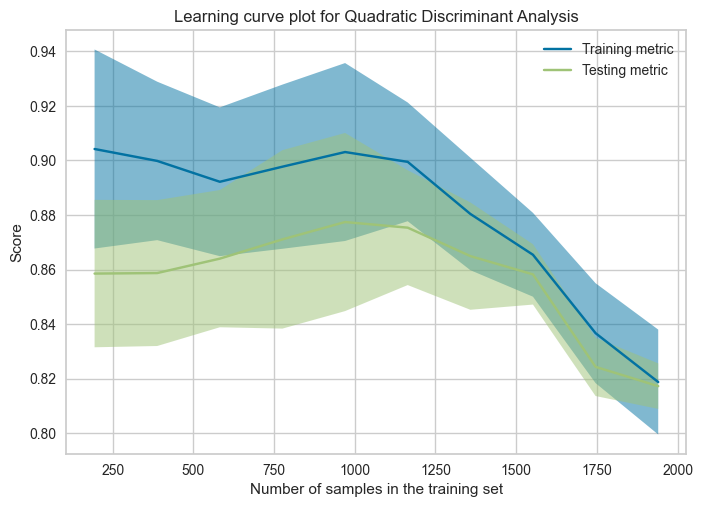

In [138]:
import matplotlib.pyplot as plt
from sklearn.model_selection import LearningCurveDisplay, learning_curve
from sklearn.metrics import fbeta_score, make_scorer

ffour_scorer = make_scorer(fbeta_score, beta=4)
ffour_scorer

X = nearmiss.get_config("X_transformed")
y = nearmiss.get_config("y_transformed")

common_params = {
    "X": X,
    "y": y,
    "train_sizes": np.linspace(0.1, 1.0, 10),
    "score_type": "both",
    "cv": 5,
    "scoring": ffour_scorer,
}

LearningCurveDisplay.from_estimator(best_model, **common_params)
plt.title('Learning curve plot for Quadratic Discriminant Analysis')
plt.show()

The QDA model initially fits the training data very well, but as the data increases, the model performance on the training data decreases and the model performance on the testing data stabilizes, indicating better generalization with more data. The gap between the training and testing scores is initially very wide and decreases as the data increases, but there is still a slight overfitting, the smallest gap is at train size 0.8.

b. Probability Thresholds

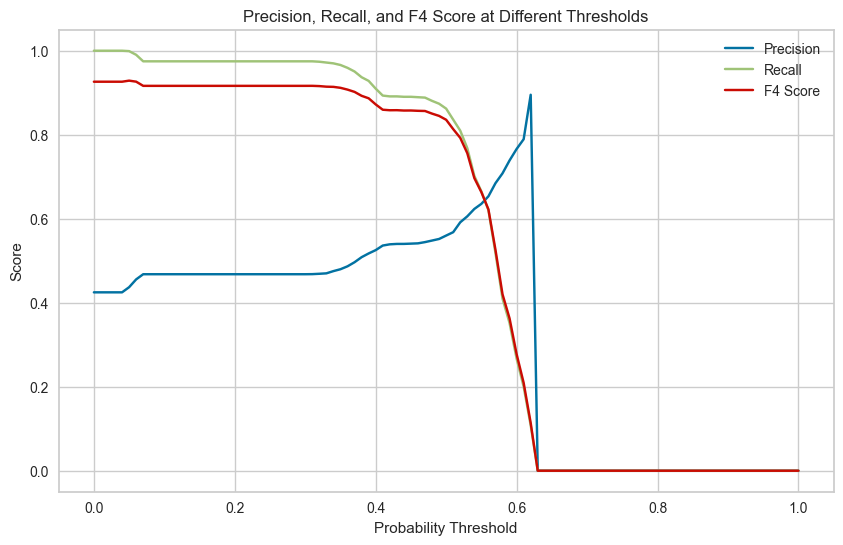

In [139]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, fbeta_score



X_train= nearmiss.get_config('X_transformed')
y_train= nearmiss.get_config('y_transformed')

# Predict probabilities
y_probs = best_model.predict_proba(X_train)[:, 1]

# Function to calculate precision, recall, and F4 score at different thresholds
def calculate_metrics(y_true, y_probs, thresholds):
    precision = []
    recall = []
    f4_scores = []
    
    for t in thresholds:
        y_pred = (y_probs >= t).astype(int)
        precision.append(np.sum((y_pred == 1) & (y_true == 1)) / np.sum(y_pred) if np.sum(y_pred) > 0 else 0)
        recall.append(np.sum((y_pred == 1) & (y_true == 1)) / np.sum(y_true))
        f4_scores.append(fbeta_score(y_true, y_pred, beta=4))
    
    return precision, recall, f4_scores

# Evaluate metrics at different thresholds
thresholds = np.arange(0.0, 1.01, 0.01)
precision, recall, f4_scores = calculate_metrics(y_train, y_probs, thresholds)

# Plot precision, recall, and F4 score for different thresholds
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision, label='Precision')
plt.plot(thresholds, recall, label='Recall')
plt.plot(thresholds, f4_scores, label='F4 Score')
plt.xlabel('Probability Threshold')
plt.ylabel('Score')
plt.title('Precision, Recall, and F4 Score at Different Thresholds')
plt.legend()
plt.grid(True)
plt.show()


The probability threshold graphs for F4, recall, and precision show that at:

- F4 and Recall: F4 and recall values at tresholds smaller than 0.4 are stable and tend to be good, before dropping dramatically at probability tresholds of around 0.5

- Precision: The precision value is initially stable with a slight increase towards 0.4 and then increases dramatically up to a threshold of 0.6 but drops dramatically at a threshold of 0.6.

This model considers the value of F4 where this value gives greater weight to recall than to precision, so a threshold of 0.4 is chosen where the recall value is still quite high with a precision value that is not too low.

e. Calibration Curve

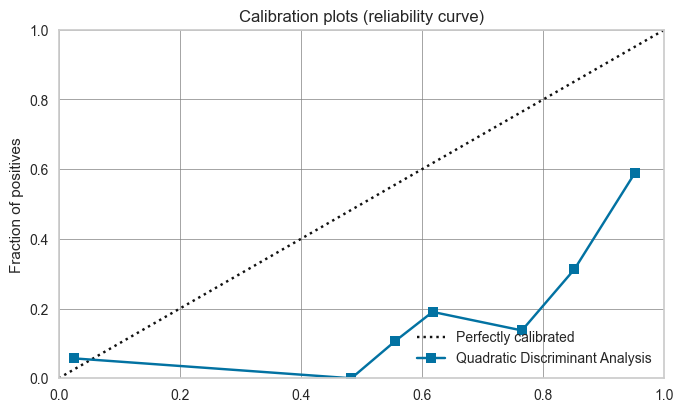

In [140]:
nearmiss.plot_model(best_model,'calibration')


- Underestimation at lower probabilities: The initial flatness of the curve indicates that the model underestimates the probability of positive outcomes at lower predicted probabilities.
- Mixed performance at mid-range probabilities: The curve's fluctuation around mid-range predicted probabilities (0.4 to 0.6) shows that the model's predictions do not consistently match the actual outcomes in this range.
- Better performance at higher probabilities: The steep rise towards the higher end of predicted probabilities suggests that the model's higher probability predictions are closer to the actual fraction of positives, though the steepness indicates overconfidence.

Overall, the calibration curve reveals that while the Quadratic Discriminant Analysis model is somewhat effective in predicting high probabilities for positive outcomes, it struggles with consistency across the full range of predicted probabilities and tends to underpredict at lower probabilities and overpredict at higher probabilities.

#### **6.3 Prediction on Validation Data**

From the classification report results between train data and validation data, the classification report values are not too far between the 2 values, so it can be concluded that the model already can generalize train and validation data and does not experience underfitting or overfitting.

In [141]:
a= nearmiss.tune_model(qda_imb_tuned, optimize='F4', return_train_score=True)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


`Once all the model performance is judged to be correct, it is time for fitting with the train + validation data`

In [142]:
final_model = nearmiss.finalize_model(best_model)

## **7. Model Intrepetation**

#### **7.1 Model Workflow**

Discriminant analysis belongs to the branch of classification methods called generative modeling, where we try to estimate the within-class density of X given the class label. Combined with the `prior probability (unconditioned probability)` of classes, the `posterior probability` of Y can be obtained by the Bayes formula. Quadratic Disctiminant Analysis is one of discriminant analysis methods, Quadratic Discriminant Analysis (QDA) is a classification technique that generalizes Linear Discriminant Analysis (LDA) by allowing each class to have its own `covariance matrix`, it adapts to the unique characteristics and variability within different classes, making it a formidable ally in diverse datasets.

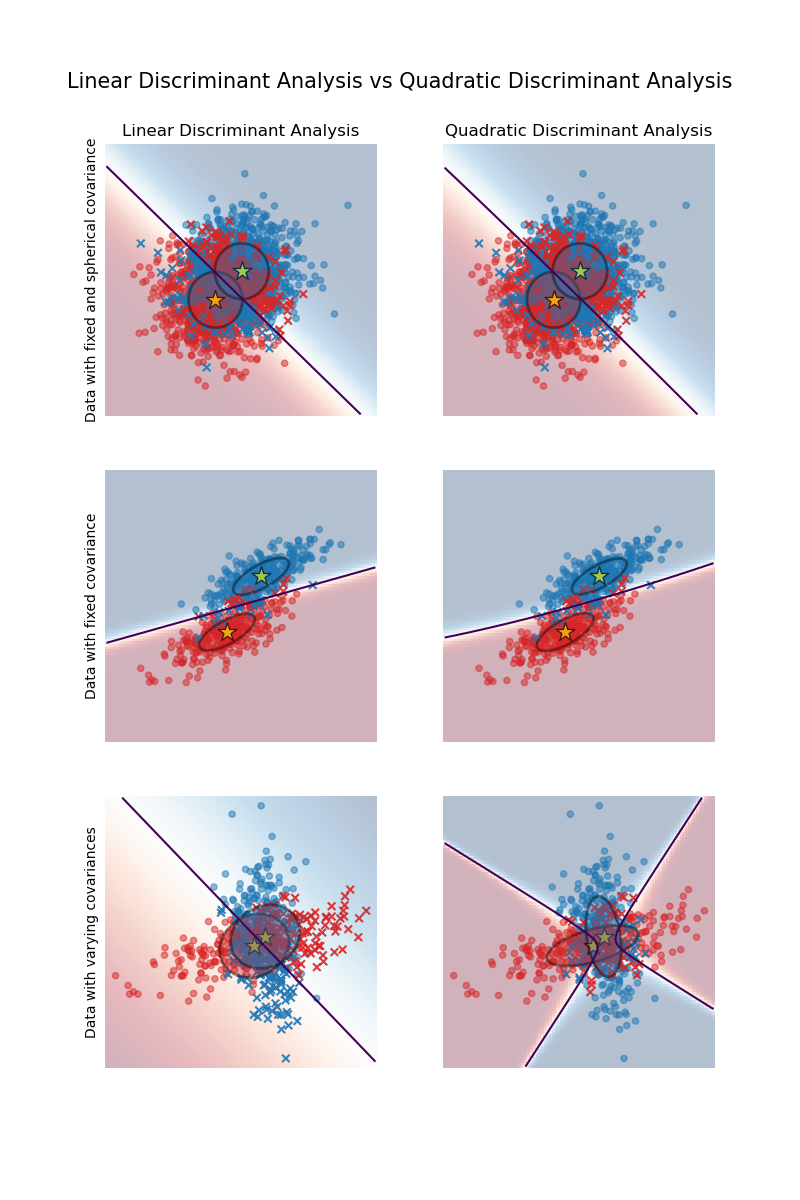



The plot shows decision boundaries for Linear Discriminant Analysis and Quadratic Discriminant Analysis. The bottom row demonstrates that Linear Discriminant Analysis can only learn linear boundaries, while Quadratic Discriminant Analysis can learn quadratic boundaries and is therefore more flexible.

Key Assumptions:
1. `Multivariate Normality`: QDA assumes that the predictor variables within each class follow a multivariate normal distribution. This means that the feature values for each class form a bell-shaped distribution in a higher-dimensional space. While this assumption may appear stringent, it allows QDA to capture the statistical properties of the data in a meaningful way.
2. `Class-Specific Covariance Matrix`: QDA goes a step further by assuming that each class has its own covariance matrix. This implies that the spread and shape of the feature values can vary across different classes. By estimating separate covariance matrix, QDA accommodates the unique characteristics and variability within each class, enabling more flexible modelling.
3. `Independence of Observations`: QDA assumes that the observations within each class are independent of each other. In other words, the feature values for one observation do not depend on or influence the feature values of other observations within the same class. This assumption simplifies the modelling process and ensures that each observation contributes independently to the classification.


Mathematical Formulation:
1. Probability Density Function:
    Each class *k* is assumed to follow a multivariate normal distribution with its own mean vector μk and covariance matrix Σk:

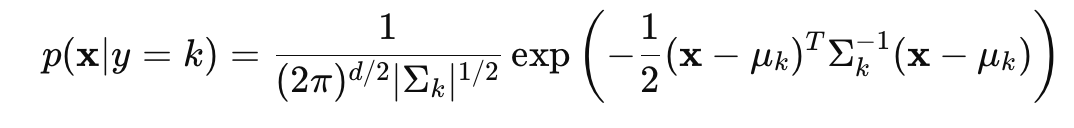

where x is the feature vector, d is the number of features, and y is the class label.

2. Prior Probabilities:
    The prior probability of each class P(y=k) can be estimated from the training data.

3. Posterior Probabilities:
    Using Bayes’ theorem, the posterior probability for class k given the feature vector x is:

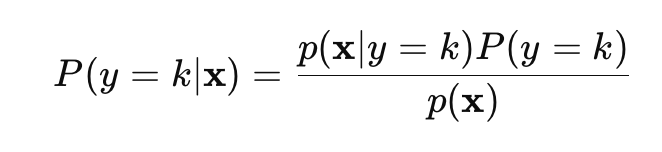

where p(x) is the marginal probability density of x, calculated by summing over all classes:

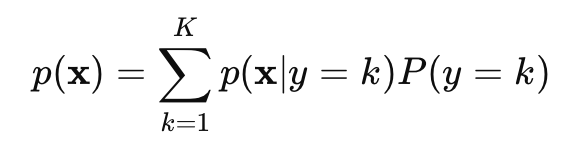
    

4. Discriminant Function:
    For classification, the discriminant function for each class k is derived as:
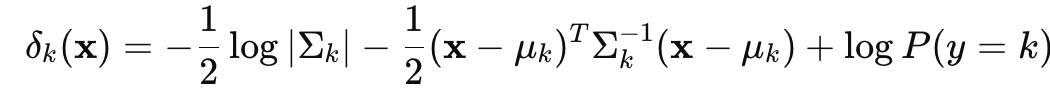

    The class with the highest discriminant function value is chosen as the predicted class:    
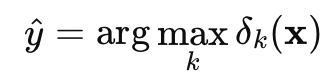

#### **7.2 Model Limitation**

In [143]:
#Dataset Information
print(f'Sum of row and columns: {df_seen.shape}')

pd.DataFrame({
    'Name': df_seen.columns.values,
    'Type': df_seen.dtypes.values,
    'N/A (%)': df_seen.isna().mean().values * 100,
    'Unique': df_seen.nunique().values,
    'Sample': [df_seen[col].unique() for col in df.columns]
})

Sum of row and columns: (3882, 11)


,Name,Type,N/A (%),Unique,Sample
0,Dependents,object,0.0,2,"[No, Yes]"
1,tenure,int64,0.0,73,"[11, 34, 47, 72, 52, 66, 6, 71, 44, 4, 2, 1, 4..."
2,OnlineSecurity,object,0.0,3,"[No, Yes, No internet service]"
3,OnlineBackup,object,0.0,3,"[No, Yes, No internet service]"
4,InternetService,object,0.0,3,"[Fiber optic, No, DSL]"
5,DeviceProtection,object,0.0,3,"[Yes, No internet service, No]"
6,TechSupport,object,0.0,3,"[No, Yes, No internet service]"
7,Contract,object,0.0,3,"[Month-to-month, One year, Two year]"
8,PaperlessBilling,object,0.0,2,"[Yes, No]"
9,MonthlyCharges,float64,0.0,1321,"[99.5, 100.05, 113.45, 25.4, 19.65, 50.55, 23...."


In [144]:
df_seen['MonthlyCharges'].max()

118.6

This model works well with some limitations:
- `Dependents` : Type dependents No/Yes only
- `Tenure`: Tenure between 0-72 months
- `Internet Service`: Type of internet service used by customer only Fiber Optic, DSL, or none
- `Contract`: There are only 3 types of contract: Month-to-month, One Year, and Two Year.
- `Paperless Billing`: Type of billing is only Yes and No
- `Monthly Charge`: Monthly charge ranges from $18.8-$118.6

#### **7.3 Features Importance**

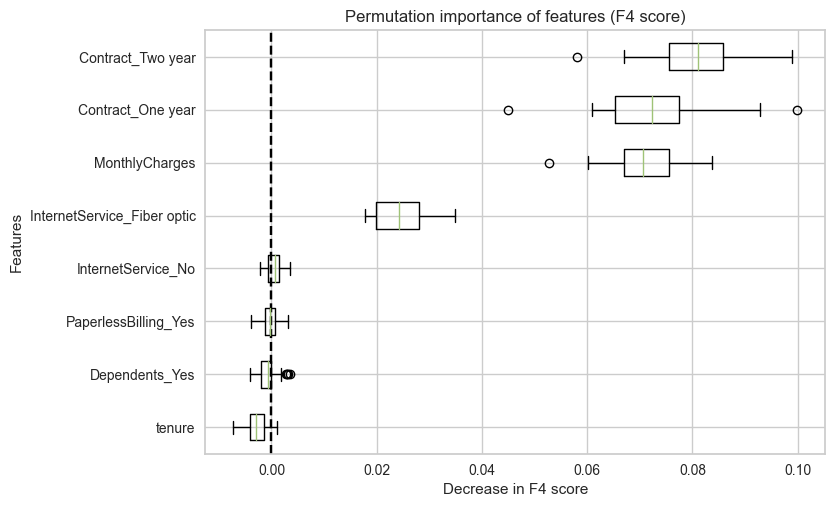

In [145]:
from sklearn.inspection import permutation_importance
from sklearn.metrics import make_scorer, fbeta_score
import matplotlib.pyplot as plt

# specify metric
ffour_scorer = make_scorer(fbeta_score, beta=4)

# define X_test and y_test
X_train = nearmiss.get_config('X_transformed')
y_train = nearmiss.get_config('y_transformed')

# plot permutation importance
result = permutation_importance(best_model, X_train, y_train, n_repeats=30, random_state=15, n_jobs=-1, scoring=ffour_scorer)
perm_sorted_idx = result.importances_mean.argsort()
plt.boxplot(result.importances[perm_sorted_idx].T, vert=False,
        labels=X.columns[perm_sorted_idx])
plt.axvline(x=0, color="black", linestyle="--")
plt.title("Permutation importance of features (F4 score)")
plt.ylabel('Features')
plt.xlabel("Decrease in F4 score")
plt.show()

From the permutation plot, it can be seen that the feature that has the greatest impact on the F4 value when randomized is the type of contract chosen by the customer, followed by monthly charges and the type of internet service. Other features do not affect the F4 value obtained by the model.

#### **7.4 When is model works best**

In [146]:
result= nearmiss.predict_model(final_model, data= df_seen, raw_score=True)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,F4
0,Quadratic Discriminant Analysis,0.6471,0.8292,0.8990,0.4224,0.5748,0.3346,0.4053,0.8431


In [147]:
bin= pd.cut(result['prediction_score_1'], bins= 10, labels=False)
result['group']= bin
bin_counts = result['group'].value_counts().sort_index()

In [148]:
result

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn,prediction_label,prediction_score_0,prediction_score_1,group
2196,No,11,No,No,Fiber optic,Yes,No,Month-to-month,Yes,99.500000,1,1,0.3795,0.6205,9
2284,No,34,No,No,Fiber optic,Yes,No,Month-to-month,Yes,100.050003,1,1,0.4231,0.5769,8
2583,Yes,47,Yes,Yes,Fiber optic,Yes,Yes,One year,Yes,113.449997,0,0,0.6233,0.3767,5
1615,No,72,No internet service,No internet service,No,No internet service,No internet service,Two year,No,25.400000,0,0,0.9247,0.0753,0
4757,Yes,52,No internet service,No internet service,No,No internet service,No internet service,One year,No,19.650000,0,0,0.7024,0.2976,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4638,Yes,51,Yes,Yes,DSL,No,Yes,One year,Yes,69.750000,0,0,0.6432,0.3568,5
4237,No,7,No,No,Fiber optic,No,No,Month-to-month,Yes,79.300003,1,1,0.3663,0.6337,9
1385,Yes,12,No,No,DSL,No,No,Month-to-month,Yes,44.549999,1,1,0.4816,0.5184,7
4586,Yes,3,No,No,DSL,No,Yes,Month-to-month,No,70.699997,0,1,0.5432,0.4568,6


In [149]:
from sklearn.metrics import *
results = []

for i in result.group.unique():
    dt = result[result['group'] == i]
    if i <= 5:
        a = balanced_accuracy_score(dt['Churn'], dt['prediction_label'])
        b = recall_score(dt['Churn'], dt['prediction_label'], pos_label=0)
        c = precision_score (dt['Churn'], dt['prediction_label'], pos_label=0)
        d = fbeta_score(dt['Churn'], dt['prediction_label'], beta=4,pos_label=0)
    else:
        a = balanced_accuracy_score(dt['Churn'], dt['prediction_label'])
        b = recall_score(dt['Churn'], dt['prediction_label'])
        c = precision_score (dt['Churn'], dt['prediction_label'])
        d = fbeta_score(dt['Churn'], dt['prediction_label'], beta=4)

    # Append a dictionary of the results to the list
    results.append({
        'group': i,
        'accuracy': a, 
        'recall': b, 'precision':c,
        'F4':d
    })

results_df = pd.DataFrame(results)

results_df = results_df.sort_values(by='group')
results_df

,group,accuracy,recall,precision,F4
3,0,0.500000,1.000000,0.970885,0.998239
5,3,0.500000,1.000000,0.936170,0.996005
4,4,0.500000,1.000000,0.951311,0.996998
2,5,0.515326,0.970046,0.871636,0.963646
7,6,0.500000,1.000000,0.110092,0.677741
6,7,0.500000,1.000000,0.218468,0.826152
1,8,0.500000,1.000000,0.387473,0.914922
0,9,0.500000,1.000000,0.658824,0.970438


In [150]:
prob_group= result.groupby('group').agg(func={'prediction_score_1':['min','max']})

prob_group

prediction_score_1        
                     min     max
group                           
0                 0.0426  0.0880
3                 0.2545  0.2826
4                 0.2842  0.3440
5                 0.3441  0.4042
6                 0.4046  0.4643
7                 0.4646  0.5248
8                 0.5250  0.5850
9                 0.5852  0.6454

By looking at the probability of each group, it can be seen that machine learning significantly decreases the f4 score at group 6 or when the probability of the prediction score ranges from 0.4046-0.4643. At other probabilities the machine performs well.

## **8. Prediction Unseen Data**

In [151]:
predict_unseen = nearmiss.predict_model(final_model, data=df_unseen, raw_score=True)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,F4
0,Quadratic Discriminant Analysis,0.6756,0.8416,0.9264,0.4467,0.6028,0.3808,0.4540,0.8713


#### **8.1 Impact Data**

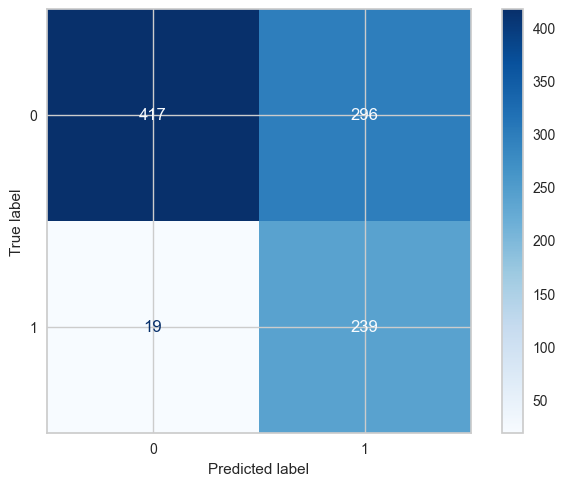

In [152]:
cm = confusion_matrix(predict_unseen['Churn'],predict_unseen['prediction_label'])

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()


From business understanding:

**Type 1 Error Simulation**

Retention Cost= (CAC/4)=($694/4)= $173,5 per Customer

**Type 2 Error Simulation**

Losing Customer Lifetime Value = Recurring Revenue x Diff Customer Lifespan = $70,35x(29-9)= $1407

Losing Customer Lifetime Value + Customer Acquisition Cost= $1407 + $694= $2101 per Customer

**1. Using Machine learning**

- Total Customer: 971 customers
- True Positive (TP) 239 customers
- True Negative (TN) 417 customers
- False Positive (FP) 296 customers
- False Negative (FN) 19 customers

The total cost that the company spent when using the machine learning model was:
- Expend retention costs on people who are predicted to churn (TP and FP):
      Retention Cost x (TP+FP)= $173.5 x (296+239)= **$92822.5**
- Loss due to false negative (FN):
      Type 2 error=  $2101 x 19 = **$39919**

`The total cost when using machine learning is $132,741.5`

**2. Without using Machine Learning**
The company will provide retention treatment to all customers

Retention cost x total customers = $173.5 x 971 = **$168,468**

`The total cost that the company will incur to retain all customers is $168,468`.


By using machine learning, the company was able to saving cost **$35,727** or about **20%**. Machine learning has successfully predicted correctly **93%** of customers who actually churned.

**Note: All of these calculations are the result of a median approach to the data, as well as an approach based on the same industry.**

#### **8.2 Counterfactuals Explanation**

In [153]:
import dice_ml

continuous_features = ['tenure','MonthlyCharges']
# prepare the data
df_train = nearmiss.get_config('X_train')
df_train['Churn'] = nearmiss.get_config('y_train')
data_dice = dice_ml.Data(dataframe=df_train, continuous_features=continuous_features, outcome_name='Churn')
data_dice

# model
rf_dice = dice_ml.Model(model=final_model, backend="sklearn")

# explainer
explainer = dice_ml.Dice(data_dice, rf_dice, method="kdtree")

In [154]:
X_test_0= predict_unseen[(predict_unseen['prediction_score_1']>=0.0426)&(predict_unseen['prediction_score_1']<=0.088)].head(2)
X_test_0= X_test_0[['Dependents','tenure','InternetService','Contract','PaperlessBilling','MonthlyCharges']]
X_test_0

,Dependents,tenure,InternetService,Contract,PaperlessBilling,MonthlyCharges
3433,No,69,DSL,Two year,Yes,66.900002
4035,Yes,18,No,Two year,Yes,24.650000


In [155]:
X_test_6= predict_unseen[(predict_unseen['prediction_score_1']>=0.4046)&(predict_unseen['prediction_score_1']<=0.4643)].head(2)
X_test_6= X_test_6[['Dependents','tenure','InternetService','Contract','PaperlessBilling','MonthlyCharges']]
X_test_6

,Dependents,tenure,InternetService,Contract,PaperlessBilling,MonthlyCharges
22,Yes,34,No,Month-to-month,No,20.650000
4546,Yes,64,Fiber optic,Month-to-month,No,81.050003


In [156]:
X_test_9= predict_unseen[(predict_unseen['prediction_score_1']>=0.5852)&(predict_unseen['prediction_score_1']<=0.6454)].head(4)
X_test_9= X_test_9[['Dependents','tenure','InternetService','Contract','PaperlessBilling','MonthlyCharges']]
X_test_9

,Dependents,tenure,InternetService,Contract,PaperlessBilling,MonthlyCharges
852,No,9,Fiber optic,Month-to-month,Yes,76.849998
1215,No,11,Fiber optic,Month-to-month,Yes,84.800003
4689,No,3,Fiber optic,Month-to-month,No,76.099998
377,No,4,Fiber optic,Month-to-month,No,77.949997


In [157]:
# Generate CF based on the blackbox model
cf = explainer.generate_counterfactuals(X_test_0, total_CFs=5, desired_class="opposite")

# Visualize it
cf.visualize_as_dataframe(show_only_changes=True)

100%|██████████| 2/2 [00:10<00:00,  5.33s/it]

Query instance (original outcome : 0)


,Dependents,tenure,InternetService,Contract,PaperlessBilling,MonthlyCharges,Churn
0,No,69,DSL,Two year,Yes,66.900002,0



Diverse Counterfactual set (new outcome: 1)


,Dependents,tenure,InternetService,Contract,PaperlessBilling,MonthlyCharges,Churn
4338,-,59,-,Month-to-month,-,-,1
610,-,-,-,Month-to-month,-,55.150001525878906,1
3226,-,54,-,Month-to-month,-,-,1
1572,-,57,-,Month-to-month,-,53.75,1
2899,-,59,-,Month-to-month,-,51.70000076293945,1


Query instance (original outcome : 0)


,Dependents,tenure,InternetService,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,18,No,Two year,Yes,24.65,0



Diverse Counterfactual set (new outcome: 1)


,Dependents,tenure,InternetService,Contract,PaperlessBilling,MonthlyCharges,Churn
1054,-,-,DSL,Month-to-month,-,-,1
3456,No,-,-,Month-to-month,-,19.549999237060547,1
3044,No,-,-,Month-to-month,-,-,1
2399,No,-,-,Month-to-month,-,-,1
4195,No,-,-,Month-to-month,-,-,1


In [158]:
# Generate CF based on the blackbox model
cf = explainer.generate_counterfactuals(X_test_6, total_CFs=5, desired_class="opposite")

# Visualize it
cf.visualize_as_dataframe(show_only_changes=True)

100%|██████████| 2/2 [00:05<00:00,  2.63s/it]

Query instance (original outcome : 0)


,Dependents,tenure,InternetService,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,34,No,Month-to-month,No,20.65,0



Diverse Counterfactual set (new outcome: 1)


,Dependents,tenure,InternetService,Contract,PaperlessBilling,MonthlyCharges,Churn
1105,No,-,-,-,-,-,1
3723,No,-,-,-,-,-,1
884,No,-,-,-,-,-,1
2757,No,-,-,-,-,-,1
1317,No,-,-,-,-,-,1


Query instance (original outcome : 0)


,Dependents,tenure,InternetService,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,64,Fiber optic,Month-to-month,No,81.050003,0



Diverse Counterfactual set (new outcome: 1)


,Dependents,tenure,InternetService,Contract,PaperlessBilling,MonthlyCharges,Churn
1129,No,-,-,-,Yes,89.0999984741211,1
3163,No,55,-,-,Yes,-,1
4862,No,56,-,-,Yes,76.8499984741211,1
2963,No,56,-,-,Yes,85.5999984741211,1
1345,No,57,-,-,Yes,87.55000305175781,1


In [159]:
# Generate CF based on the blackbox model
cf = explainer.generate_counterfactuals(X_test_9, total_CFs=5, desired_class="opposite")

# Visualize it
cf.visualize_as_dataframe(show_only_changes=True)

  0%|          | 0/4 [00:00<?, ?it/s]

100%|██████████| 4/4 [00:30<00:00,  7.68s/it]

Query instance (original outcome : 1)


,Dependents,tenure,InternetService,Contract,PaperlessBilling,MonthlyCharges,Churn
0,No,9,Fiber optic,Month-to-month,Yes,76.849998,1



Diverse Counterfactual set (new outcome: 0)


,Dependents,tenure,InternetService,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,-,DSL,-,-,-,0
2186,-,-,-,One year,-,-,0
1556,Yes,-,DSL,-,-,-,0
831,-,-,DSL,-,No,-,0
4863,-,-,DSL,-,No,-,0


Query instance (original outcome : 1)


,Dependents,tenure,InternetService,Contract,PaperlessBilling,MonthlyCharges,Churn
0,No,11,Fiber optic,Month-to-month,Yes,84.800003,1



Diverse Counterfactual set (new outcome: 0)


,Dependents,tenure,InternetService,Contract,PaperlessBilling,MonthlyCharges,Churn
2114,-,18,-,One year,-,89.5999984741211,0
2570,-,-,DSL,-,No,-,0
3361,-,-,-,One year,-,94.05000305175781,0
2186,-,-,-,One year,-,74.6500015258789,0
3670,Yes,-,-,One year,-,90.3499984741211,0


Query instance (original outcome : 1)


,Dependents,tenure,InternetService,Contract,PaperlessBilling,MonthlyCharges,Churn
0,No,3,Fiber optic,Month-to-month,No,76.099998,1



Diverse Counterfactual set (new outcome: 0)


,Dependents,tenure,InternetService,Contract,PaperlessBilling,MonthlyCharges,Churn
316,-,-,DSL,-,-,-,0
4863,-,-,DSL,-,-,-,0
831,-,-,DSL,-,-,-,0
2995,-,-,DSL,Two year,-,71.0999984741211,0
4586,Yes,-,DSL,-,-,70.69999694824219,0


Query instance (original outcome : 1)


,Dependents,tenure,InternetService,Contract,PaperlessBilling,MonthlyCharges,Churn
0,No,4,Fiber optic,Month-to-month,No,77.949997,1



Diverse Counterfactual set (new outcome: 0)


,Dependents,tenure,InternetService,Contract,PaperlessBilling,MonthlyCharges,Churn
831,-,-,DSL,-,-,-,0
316,-,-,DSL,-,-,-,0
4863,-,-,DSL,-,-,-,0
762,-,13,DSL,-,-,73.3499984741211,0
2966,-,-,DSL,One year,-,-,0


In [160]:
df_seen.groupby('InternetService').agg(func={'MonthlyCharges':'median'})

,MonthlyCharges
InternetService,
DSL,56.050
Fiber optic,91.325
No,20.150


From the counterfactual analysis, it is found that to change customers who initially churn to not churn, the main feature that must be considered is the type of **contract**, the month-to-month contract type has a greater churn potential than the other two contract types, namely One Year and Two Year. From the type of **internet service** chosen, customers who use fiber optic also have a greater potential to churn, and if connected to the **monthly charges**, customers with fiber optic internet service have a monthly charge 60% higher than DSL and 350% of customers who do not have internet service. Another thing to note is that customers who do not have **dependents** tend to churn when compared to those who have dependents.

## **9. Conclusion and Recomendation**

#### **9.1 Conclusion**

1. Main metric, the main metric used in building machine learning models this time is the F4 score, because the impact of false negatives is far greater than false positives.

2. The best model used is using Quadratic Discriminant Analysis (QDA) with hyperparameter tuning on priors (0.3,0.7) and using a probability threshold of 0.4.

3. Model Evaluation, based on the results of model evaluation on train and validation data, the model has worked quite well as seen from no significant overfitting or underfitting tendencies. Calibration results show that the model is effective in predicting high probabilities for positive outcomes but struggles with consistency across the full range.

4. Model Intrepetation

    a. Model Limitation

     - `Dependents` : Type dependents No/Yes only
     - `Tenure`: Tenure between 0-72 months
     - `Internet Service`: Type of internet service used by customer only Fiber Optic, DSL, or none
     - `Contract`: There are only 3 contract types: Month-to-month, One Year, and Two Year.
     - `Paperless Billing`: Type of billing is only Yes and No
     - `Monthly Charge`: Monthly charge ranges from $18.8-$118.6

    b. Feature Importance

     The feature that most affects the performance of the model (seen from the decrease in F4) is `Contract` selected by the customer, followed by `Monthly Charges` and the type of `Internet Service`.

    c. Model Works Best
        - The model works well when the predicted probabilities range between 0.0426-0.4042 and 0.4646-0.6454.
        - The model works less well when the predicted probabilities range between 0.4046-0.4643.

5.Model Impact

 - Using machine learning, the total cost incurred by the company is $132,741.5
 - Without using machine learning, the total cost incurred by the company to retain all customers is $168,468.
 - The company is able to save costs around `$35,727` or about `20%` by using machine learning, in addition to using machine learning has successfully predicted correctly `93%` of customers who actually ch

#### **9.2 Recomendation**

- Some recommendations for retention strategies to minimize customer churn:
1. Loyalty Programs
    Offering rewards and incentives for customers who choose One Year or Two Year Contract, so as to attract customers to choose a longer contract type and minimize the possibility of churn.
2. Cost Evaluation to Fiber Optic Internet service
    The high monthly charge for consumers who use fiber optic as an internet service is one of the factors that make customers churn, therefore another evaluation of the price for this service is needed.
3. In general, improve service quality, customer service, and periodically reach out to customers in order to measure customer satisfaction in using services from the company.


- Recommendations on improving machine learning models
1. Selection of methods that are robust to multicollinearity so that they can cover more features.
2. Collect more data to minimize the imbalance between classes
3. Collecting more personalized customer data such as age, gender, so that it can be more detailed in conducting churn analysis.
4. Conduct a periodic evaluation of the model that has been created.

#### `Saving The Model`

In [161]:
nearmiss.save_model(final_model, '../model/Deployment_27052024')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/var/folders/r3/3x0l6ykd3bn24txdxp3s1rwh0000gn/T/joblib),
          steps=[('onehot',
                  TransformerWrapper(exclude=None, include=None,
                                     transformer=TransformerWrapper(exclude=None,
                                                                    include=['Dependents',
                                                                             'PaperlessBilling',
                                                                             'OnlineSecurity',
                                                                             'OnlineBackup',
                                                                             'InternetService',
                                                                             'DeviceProtection',
                                                                             'TechSupport',
                                                                     